### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


import warnings
warnings.filterwarnings('ignore')

# 1.Prepare data for Analysis,  Treat Missing Data, Wrong Data, Outlier Data

### Read the data

In [2]:
df=pd.read_excel('Attrition Case Study.xlsx')
df

Attrition  Age     BusinessTravel  DailyRate              Department  \
0             1   41      Travel_Rarely       1102                   Sales   
1             0   49  Travel_Frequently        279  Research & Development   
2             1   37      Travel_Rarely       1373  Research & Development   
3             0   33  Travel_Frequently       1392  Research & Development   
4             0   27      Travel_Rarely        591  Research & Development   
...         ...  ...                ...        ...                     ...   
1465          0   36  Travel_Frequently        884  Research & Development   
1466          0   39      Travel_Rarely        613  Research & Development   
1467          0   27      Travel_Rarely        155  Research & Development   
1468          0   49  Travel_Frequently       1023                   Sales   
1469          0   34      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2        

### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

### Handling missing data values

In [5]:
df.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### No missing values are present in the dataset

In [6]:
#Features which has no statstical importance and independent variables are dropped.
y=df[['Attrition']]
h=df[['EmployeeNumber']]
df1=df.drop(labels=['Attrition','EmployeeCount','Over18','StandardHours','EmployeeNumber'],axis=1)
df1

Age     BusinessTravel  DailyRate              Department  \
0      41      Travel_Rarely       1102                   Sales   
1      49  Travel_Frequently        279  Research & Development   
2      37      Travel_Rarely       1373  Research & Development   
3      33  Travel_Frequently       1392  Research & Development   
4      27      Travel_Rarely        591  Research & Development   
...   ...                ...        ...                     ...   
1465   36  Travel_Frequently        884  Research & Development   
1466   39      Travel_Rarely        613  Research & Development   
1467   27      Travel_Rarely        155  Research & Development   
1468   49  Travel_Frequently       1023                   Sales   
1469   34      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  HourlyRate  ...  PerformanceRating  RelationshipSatisfaction  \
0     Female          94  ...                  3                         1   
1       Male          61  ...                  4                         4   
2       Male          92  ...                  3                         2   
3     Female          56  ...                  3                         3   
4       Male          40  ...                  3                         4   
...      ...         ...  ...                ...                       ...   
1465    Male          41  ...                  3                         3   
1466    Male          42  ...                  3                         1   
1467    Male          87  ...                  4                         2   
1468    Male          63  ...                  3                         4   
1469    Male          82  ...                  3                         1   

     StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  \
0                   0                  8                     0   
1                   1                 10                     3   
2                   0                  7                     3   
3                   0                  8                     3   
4                   1                  6                     3   
...               ...                ...                   ...   
1465                1                 17                     3   
1466                1                  9                     5   
1467                1                  6                     0   
1468                0                 17                     3   
1469                0                  6                     3   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                   1               6                   4   
1                   3              10                   7   
2                   3               0                   0   
3                   3               8                   7   
4                   3               2                   2   
...               ...             ...                 ...   
1465                3               5                   2   
1466                3               7                   7 

### Outiers

In [7]:
cat=[]
con=[]
for i in df1.columns:
    if(df1[i].dtypes=='object'):
        cat.append(i)
    else:
        con.append(i)

In [8]:
cat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [9]:
con

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [10]:
df_con=df1[con]
df_con

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0      41       1102                 1          2                        2   
1      49        279                 8          1                        3   
2      37       1373                 2          2                        4   
3      33       1392                 3          4                        4   
4      27        591                 2          1                        1   
...   ...        ...               ...        ...                      ...   
1465   36        884                23          2                        3   
1466   39        613                 6          1                        4   
1467   27        155                 4          3                        2   
1468   49       1023                 2          3                        4   
1469   34        628                 8          3                        2   

      HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0             94               3         2                4           5993   
1             61               2         2                2           5130   
2             92               2         1                3           2090   
3             56               3         1                3           2909   
4             40               3         1                2           3468   
...          ...             ...       ...              ...            ...   
1465          41               4         2                4           2571   
1466          42               2         3                1           9991   
1467          87               4         2                2           6142   
1468          63               2         2                2           5390   
1469          82               4         2                3           4404   

      ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0     ...                  3                         1                 0   
1     ...                  4                         4                 1   
2     ...                  3                         2                 0   
3     ...                  3                         3                 0   
4     ...                  3                         4                 1   
...   ...                ...                       ...               ...   
1465  ...                  3                         3                 1   
1466  ...                  3                         1                 1   
1467  ...                  4                         2                 1   
1468  ...                  3                         4                 0   
1469  ...                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   


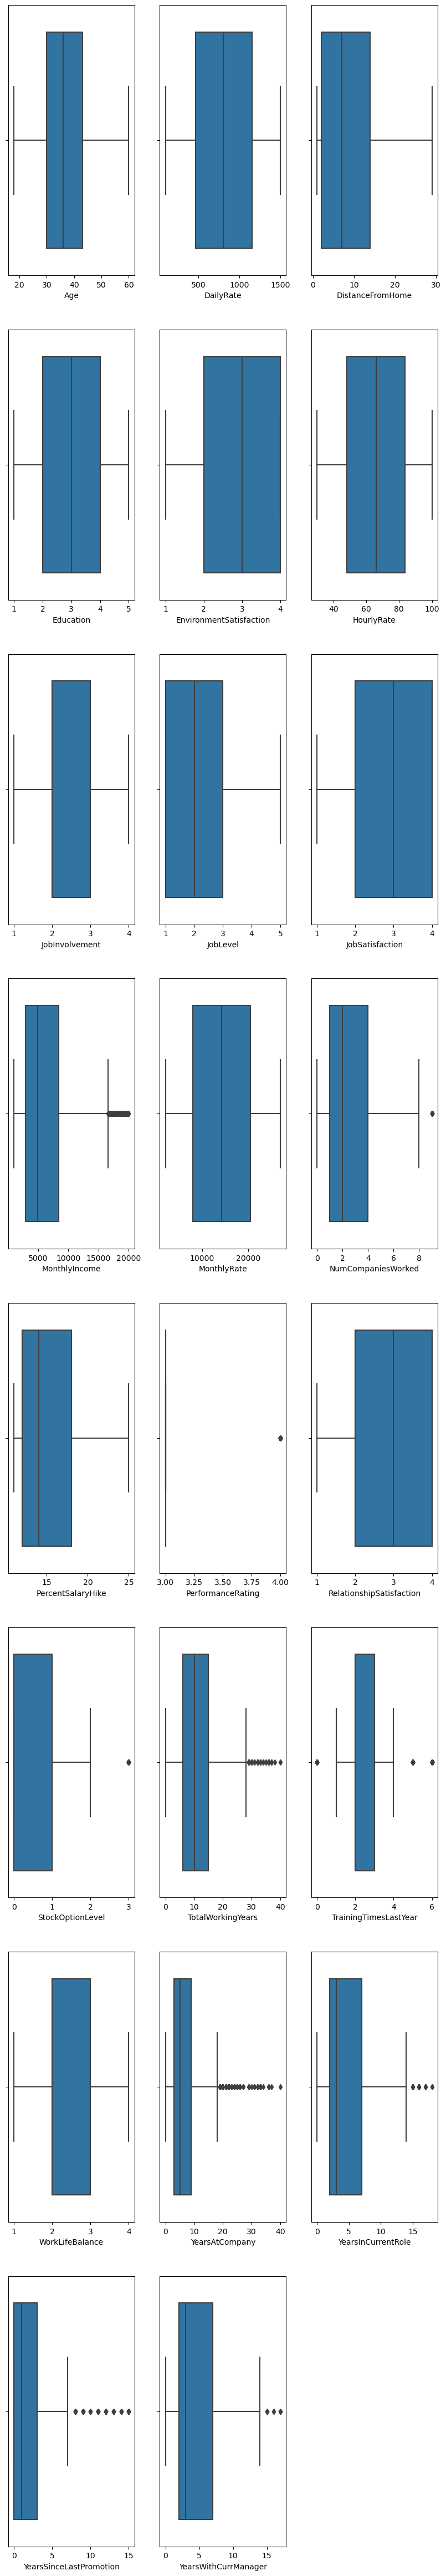

In [11]:
plt.figure(figsize=(10,90))
for x,i in enumerate(df_con.columns):
    if df_con[i].dtypes=='int64' or df_con[i].dtypes=='float64':
        plt.subplot(12,3,x+1)
        sb.boxplot(df_con[i])

In [12]:
for i in df_con.columns:
        q1=df_con[i].quantile(0.25)
        q3=df_con[i].quantile(0.75)
        IQR=q3-q1
        upper_limit=q3+1.5*IQR
        lower_limit=q1-1.5*IQR

        mean=df_con[i].mean()
        df_con.loc[(df_con[i]>upper_limit)|(df_con[i]<lower_limit) ,i]=mean
        df_con.loc[(df_con[i]>upper_limit) | (df_con[i]<lower_limit) ,i]



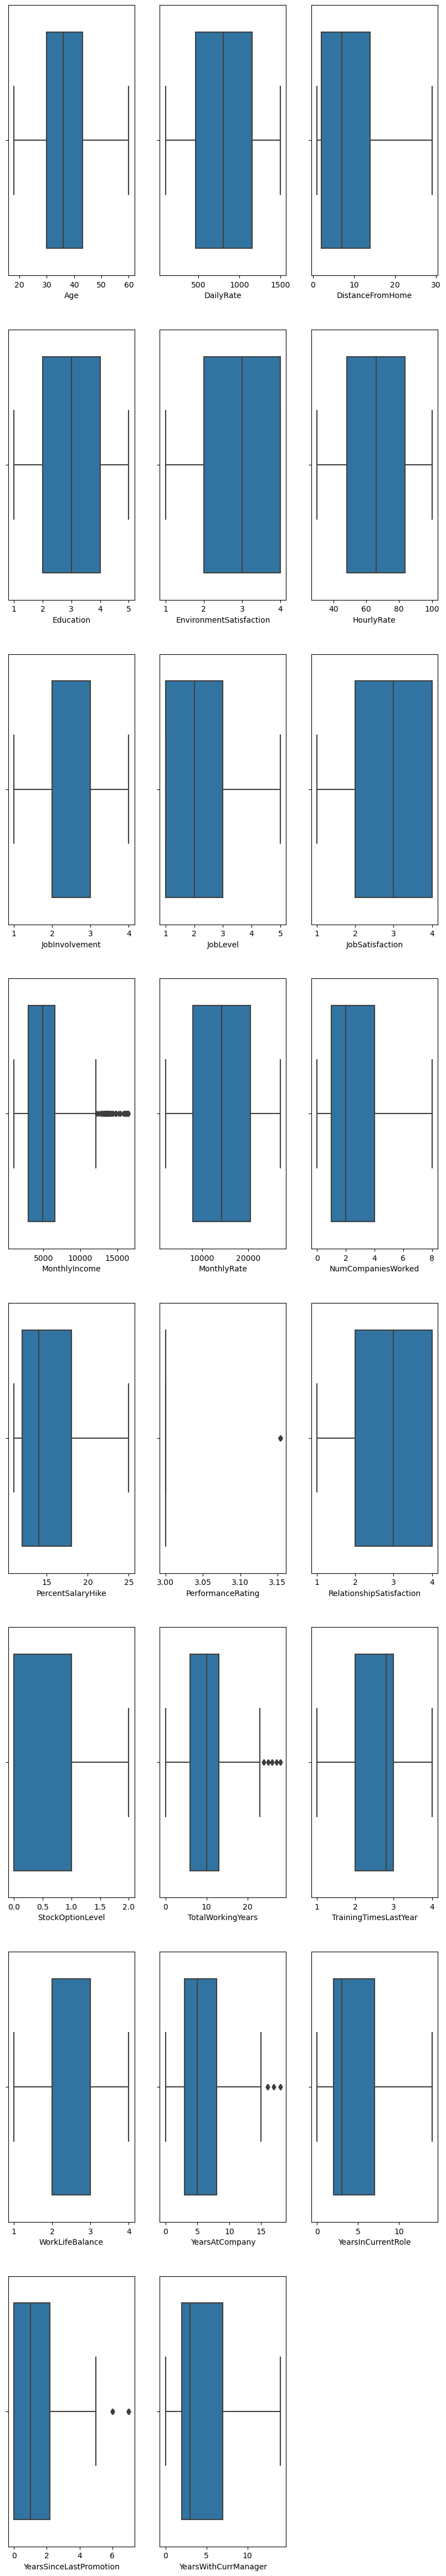

In [13]:
plt.figure(figsize=(10,90))
for x,i in enumerate(df_con.columns):
    if df_con[i].dtypes=='int64' or df_con[i].dtypes=='float64':
        plt.subplot(12,3,x+1)
        sb.boxplot(df_con[i])

In [14]:
df_con.isna().sum()

Age                         0
DailyRate                   0
DistanceFromHome            0
Education                   0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# 2.Create new/derived predictors (e.g. Age group) for analysis
  (Performance Rating Review)

In [15]:
Q=[]
for i in df1.Age:
    if(i<25):
        Q.append("Youngster")
    elif(i>=25 and i<50):
        Q.append("MiddleAged")
    else:
        Q.append("Elderly")
df1['Age_Group']=Q

In [16]:
cat=[]
con=[]
for i in df1.columns:
    if(df1[i].dtypes=='object'):
        cat.append(i)
    else:
        con.append(i)

In [17]:
cat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'Age_Group']

In [18]:
df_cat=df1[cat]
df_cat

BusinessTravel              Department EducationField  Gender  \
0         Travel_Rarely                   Sales  Life Sciences  Female   
1     Travel_Frequently  Research & Development  Life Sciences    Male   
2         Travel_Rarely  Research & Development          Other    Male   
3     Travel_Frequently  Research & Development  Life Sciences  Female   
4         Travel_Rarely  Research & Development        Medical    Male   
...                 ...                     ...            ...     ...   
1465  Travel_Frequently  Research & Development        Medical    Male   
1466      Travel_Rarely  Research & Development        Medical    Male   
1467      Travel_Rarely  Research & Development  Life Sciences    Male   
1468  Travel_Frequently                   Sales        Medical    Male   
1469      Travel_Rarely  Research & Development        Medical    Male   

                        JobRole MaritalStatus OverTime   Age_Group  
0               Sales Executive        Single      Yes  MiddleAged  
1            Research Scientist       Married       No  MiddleAged  
2         Laboratory Technician        Single      Yes  MiddleAged  
3            Research Scientist       Married      Yes  MiddleAged  
4         Laboratory Technician       Married       No  MiddleAged  
...                         ...           ...      ...         ...  
1465      Laboratory Technician       Married       No  MiddleAged  
1466  Healthcare Representative       Married       No  MiddleAged  
1467     Manufacturing Director       Married      Yes  MiddleAged  
1468            Sales Executive       Married       No  MiddleAged  
1469      Laboratory Technician       Married       No  MiddleAged  

[1470 rows x 8 columns]

In [19]:
df_OHE=pd.get_dummies(df_cat)
df_OHE

BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  \
0                             0                                 0   
1                             0                                 1   
2                             0                                 0   
3                             0                                 1   
4                             0                                 0   
...                         ...                               ...   
1465                          0                                 1   
1466                          0                                 0   
1467                          0                                 0   
1468                          0                                 1   
1469                          0                                 0   

      BusinessTravel_Travel_Rarely  Department_Human Resources  \
0                                1                           0   
1                                0                           0   
2                                1                           0   
3                                0                           0   
4                                1                           0   
...                            ...                         ...   
1465                             0                           0   
1466                             1                           0   
1467                             1                           0   
1468                             0                           0   
1469                             1                           0   

      Department_Research & Development  Department_Sales  \
0                                     0                 1   
1                                     1                 0   
2                                     1                 0   
3                                     1                 0   
4                                     1                 0   
...                                 ...               ...   
1465                                  1                 0   
1466                                  1                 0   
1467                                  1                 0   
1468                                  0                 1   
1469                                  1                 0   

      EducationField_Human Resources  EducationField_Life Sciences  \
0                                  0                             1   
1                                  0                             1   
2                                  0                             0   
3                                  0                             1   
4                                  0                             0   
...                              ...                           ...   
1465                               0                             0   
1466                               0                             0   
1467                               0                             1   
1468                               0                             0   
1469                               0                             0   

      EducationField_Marketing  EducationField_Medical  ...  \
0                            0                       0  ...   
1                            0                       0  ...   
2                            0                       0  ...   
3                            0                       0  ...   
4                            0                       1  ...   
...                        ...                     ...  ...   
1465                         0                       1  ...   
1466                         0                       1  ...   
1467                         0                       0  ...   
1468                         0                       1  ...   
1469                         0                       1  ...   

      JobRole_Sales Executive  JobRole_Sales Represen

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
#Standardization of continuous columns
std_scaler = StandardScaler()
array = std_scaler.fit_transform(df_con)
df_std = pd.DataFrame(array,columns=df_con.columns)
df_std

Age  DailyRate  DistanceFromHome  Education  \
0     0.446350   0.742527         -1.010909  -0.891688   
1     1.322365  -1.297775         -0.147150  -1.868426   
2     0.008343   1.414363         -0.887515  -0.891688   
3    -0.429664   1.461466         -0.764121   1.061787   
4    -1.086676  -0.524295         -0.887515  -1.868426   
...        ...        ...               ...        ...   
1465 -0.101159   0.202082          1.703764  -0.891688   
1466  0.227347  -0.469754         -0.393938  -1.868426   
1467 -1.086676  -1.605183         -0.640727   0.085049   
1468  1.322365   0.546677         -0.887515   0.085049   
1469 -0.320163  -0.432568         -0.147150   0.085049   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                   -0.660531    1.383138        0.379672 -0.057788   
1                    0.254625   -0.240677       -1.026167 -0.057788   
2                    1.169781    1.284725       -1.026167 -0.961486   
3                    1.169781   -0.486709        0.379672 -0.961486   
4                   -1.575686   -1.274014        0.379672 -0.961486   
...                       ...         ...             ...       ...   
1465                 0.254625   -1.224807        1.785511 -0.057788   
1466                 1.169781   -1.175601       -1.026167  0.845911   
1467                -0.660531    1.038693        1.785511 -0.057788   
1468                 1.169781   -0.142264       -1.026167 -0.057788   
1469                -0.660531    0.792660        1.785511 -0.057788   

      JobSatisfaction  MonthlyIncome  ...  PerformanceRating  \
0            1.153254       0.129018  ...          -0.426230   
1           -0.660853      -0.140791  ...           2.346151   
2            0.246200      -1.091220  ...          -0.426230   
3            0.246200      -0.835167  ...          -0.426230   
4           -0.660853      -0.660400  ...          -0.426230   
...               ...            ...  ...                ...   
1465         1.153254      -0.940839  ...          -0.426230   
1466        -1.567907       1.378958  ...          -0.426230   
1467        -0.660853       0.175602  ...           2.346151   
1468        -0.660853      -0.059504  ...          -0.426230   
1469         0.246200      -0.367768  ...          -0.426230   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                    -1.584178         -1.018674          -0.374906   
1                     1.191438          0.510149          -0.057867   
2                    -0.658973         -1.018674          -0.533426   
3                     0.266233         -1.018674          -0.374906   
4                     1.191438          0.510149          -0.691946   
...                        ...               ...                ...   
1465                  0.266233          0.510149           1.051772   
1466                 -1.584178          0.510149          -0.216386   
1467                 -0.658973          0.510149          -0.691946   
1468                  1.191438         -1.018674           1.051772   
1469                 -1.584178         -1.018674          -0.691946   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  0.312607        -2.493820        0.041137   
1                  0.601911         0.338096        1.069787   
2                  0.601911         0.338096       -1.501837   
3                  0.601911         0.338096        0.555462   
4                  0.601911         0.338096       -0.987512   
...                     ...              ...             ...   
1465               0.601911         0.338096       -0.216025   
1466               0.312607         0.338096        0.298300   
1467               0.312607         0.338096        0.041137   
1468               0.601911        -1.077862        0.812625   
1469               0.601911         1.754054       -0.473188   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManage

In [22]:
final_df=pd.concat([df_std,df_OHE,y],axis=1)
final_df

Age  DailyRate  DistanceFromHome  Education  \
0     0.446350   0.742527         -1.010909  -0.891688   
1     1.322365  -1.297775         -0.147150  -1.868426   
2     0.008343   1.414363         -0.887515  -0.891688   
3    -0.429664   1.461466         -0.764121   1.061787   
4    -1.086676  -0.524295         -0.887515  -1.868426   
...        ...        ...               ...        ...   
1465 -0.101159   0.202082          1.703764  -0.891688   
1466  0.227347  -0.469754         -0.393938  -1.868426   
1467 -1.086676  -1.605183         -0.640727   0.085049   
1468  1.322365   0.546677         -0.887515   0.085049   
1469 -0.320163  -0.432568         -0.147150   0.085049   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                   -0.660531    1.383138        0.379672 -0.057788   
1                    0.254625   -0.240677       -1.026167 -0.057788   
2                    1.169781    1.284725       -1.026167 -0.961486   
3                    1.169781   -0.486709        0.379672 -0.961486   
4                   -1.575686   -1.274014        0.379672 -0.961486   
...                       ...         ...             ...       ...   
1465                 0.254625   -1.224807        1.785511 -0.057788   
1466                 1.169781   -1.175601       -1.026167  0.845911   
1467                -0.660531    1.038693        1.785511 -0.057788   
1468                 1.169781   -0.142264       -1.026167 -0.057788   
1469                -0.660531    0.792660        1.785511 -0.057788   

      JobSatisfaction  MonthlyIncome  ...  JobRole_Sales Representative  \
0            1.153254       0.129018  ...                             0   
1           -0.660853      -0.140791  ...                             0   
2            0.246200      -1.091220  ...                             0   
3            0.246200      -0.835167  ...                             0   
4           -0.660853      -0.660400  ...                             0   
...               ...            ...  ...                           ...   
1465         1.153254      -0.940839  ...                             0   
1466        -1.567907       1.378958  ...                             0   
1467        -0.660853       0.175602  ...                             0   
1468        -0.660853      -0.059504  ...                             0   
1469         0.246200      -0.367768  ...                             0   

      MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
0                          0                      0                     1   
1                          0                      1                     0   
2                          0                      0                     1   
3                          0                      1                     0   
4                          0                      1                     0   
...                      ...                    ...                   ...   
1465                       0                      1                     0   
1466                       0                      1                     0   
1467                       0                      1                     0   
1468                       0                      1                     0   
1469                       0                      1                     0   

      OverTime_No  OverTime_Yes  Age_Group_Elderly  Age_Group_MiddleAged  \
0               0             1                  0                     1   
1               1             0                  0                     1   
2               0             1                  0                     1   
3               0             1                  0                     1   
4               1             0                  0                     1   
...           ...           ...                ...                   ...   
1465            1             0                  0                     1   
1466            1          

# 3.Explore the Data using Exploratory Data Analysis - For Y and all Xs

In [23]:
final_df.corr()

Age  DailyRate  DistanceFromHome  \
Age                                1.000000   0.010661         -0.001686   
DailyRate                          0.010661   1.000000         -0.004985   
DistanceFromHome                  -0.001686  -0.004985          1.000000   
Education                          0.208034  -0.016806          0.021042   
EnvironmentSatisfaction            0.010146   0.018355         -0.016075   
HourlyRate                         0.024287   0.023381          0.031131   
JobInvolvement                     0.029820   0.046135          0.008783   
JobLevel                           0.509604   0.002966          0.005303   
JobSatisfaction                   -0.004892   0.030571         -0.003669   
MonthlyIncome                      0.398057   0.009570          0.045001   
MonthlyRate                        0.028051  -0.032182          0.027473   
NumCompaniesWorked                 0.309829   0.032875         -0.012826   
PercentSalaryHike                  0.003634   0.022704          0.040235   
PerformanceRating                  0.001904   0.000473          0.027110   
RelationshipSatisfaction           0.053535   0.007846          0.006557   
StockOptionLevel                   0.052495   0.019780          0.063633   
TotalWorkingYears                  0.573954   0.028767          0.016672   
TrainingTimesLastYear              0.036492  -0.036936         -0.044704   
WorkLifeBalance                   -0.021490  -0.037848         -0.026556   
YearsAtCompany                     0.164237  -0.002614          0.013052   
YearsInCurrentRole                 0.181189   0.006710          0.024591   
YearsSinceLastPromotion            0.126362  -0.024608          0.010396   
YearsWithCurrManager               0.185996  -0.011518          0.004658   
BusinessTravel_Non-Travel         -0.011215   0.012096          0.023605   
BusinessTravel_Travel_Frequently  -0.024743  -0.011776          0.005081   
BusinessTravel_Travel_Rarely       0.028791   0.002078         -0.020116   
Department_Human Resources         0.020523  -0.026726         -0.012901   
Department_Research & Development  0.017883   0.014871         -0.008117   
Department_Sales                  -0.027549  -0.003616          0.014085   
EducationField_Human Resources     0.001696  -0.043144         -0.002624   
EducationField_Life Sciences       0.016824   0.004028         -0.024499   
EducationField_Marketing           0.038162  -0.064449          0.039294   
EducationField_Medical            -0.006354   0.034202          0.013486   
EducationField_Other              -0.041466  -0.003893         -0.007969   
EducationField_Technical Degree   -0.027604   0.030869         -0.014802   
Gender_Female                      0.036311   0.011716          0.001851   
Gender_Male                       -0.036311  -0.011716         -0.001851   
JobRole_Healthcare Representative  0.098825   0.040141          0.022916   
JobRole_Human Resources           -0.029856  -0.021156         -0.024089   
JobRole_Laboratory Technician     -0.143176  -0.006728          0.012369   
JobRole_Manager                    0.294248  -0.013224         -0.039190   
JobRole_Manufacturing Director     0.049726  -0.005302          0.011848   
JobRole_Research Director          0.185891  -0.000021         -0.022351   
JobRole_Research Scientist        -0.146518  -0.002624         -0.010986   
JobRole_Sales Executive           -0.002001  -0.000513          0.030761   
JobRole_Sales Representative      -0.175785   0.005375         -0.015994   
MaritalStatus_Divorced             0.033120   0.037080         -0.005440   
MaritalStatus_Married              0.083919   0.040035          0.030232   
MaritalStatus_Single              -0.119185  -0.075835         -0.027445   
OverTime_No                       -0.028062  -0.009135         -0.025514   
OverTime_Yes                       0.028062   0.009135          0.025514   
Age_Group_Elderly                  0.675053   0.008149         -0.006852   
Age_Group_Mi

<AxesSubplot:>

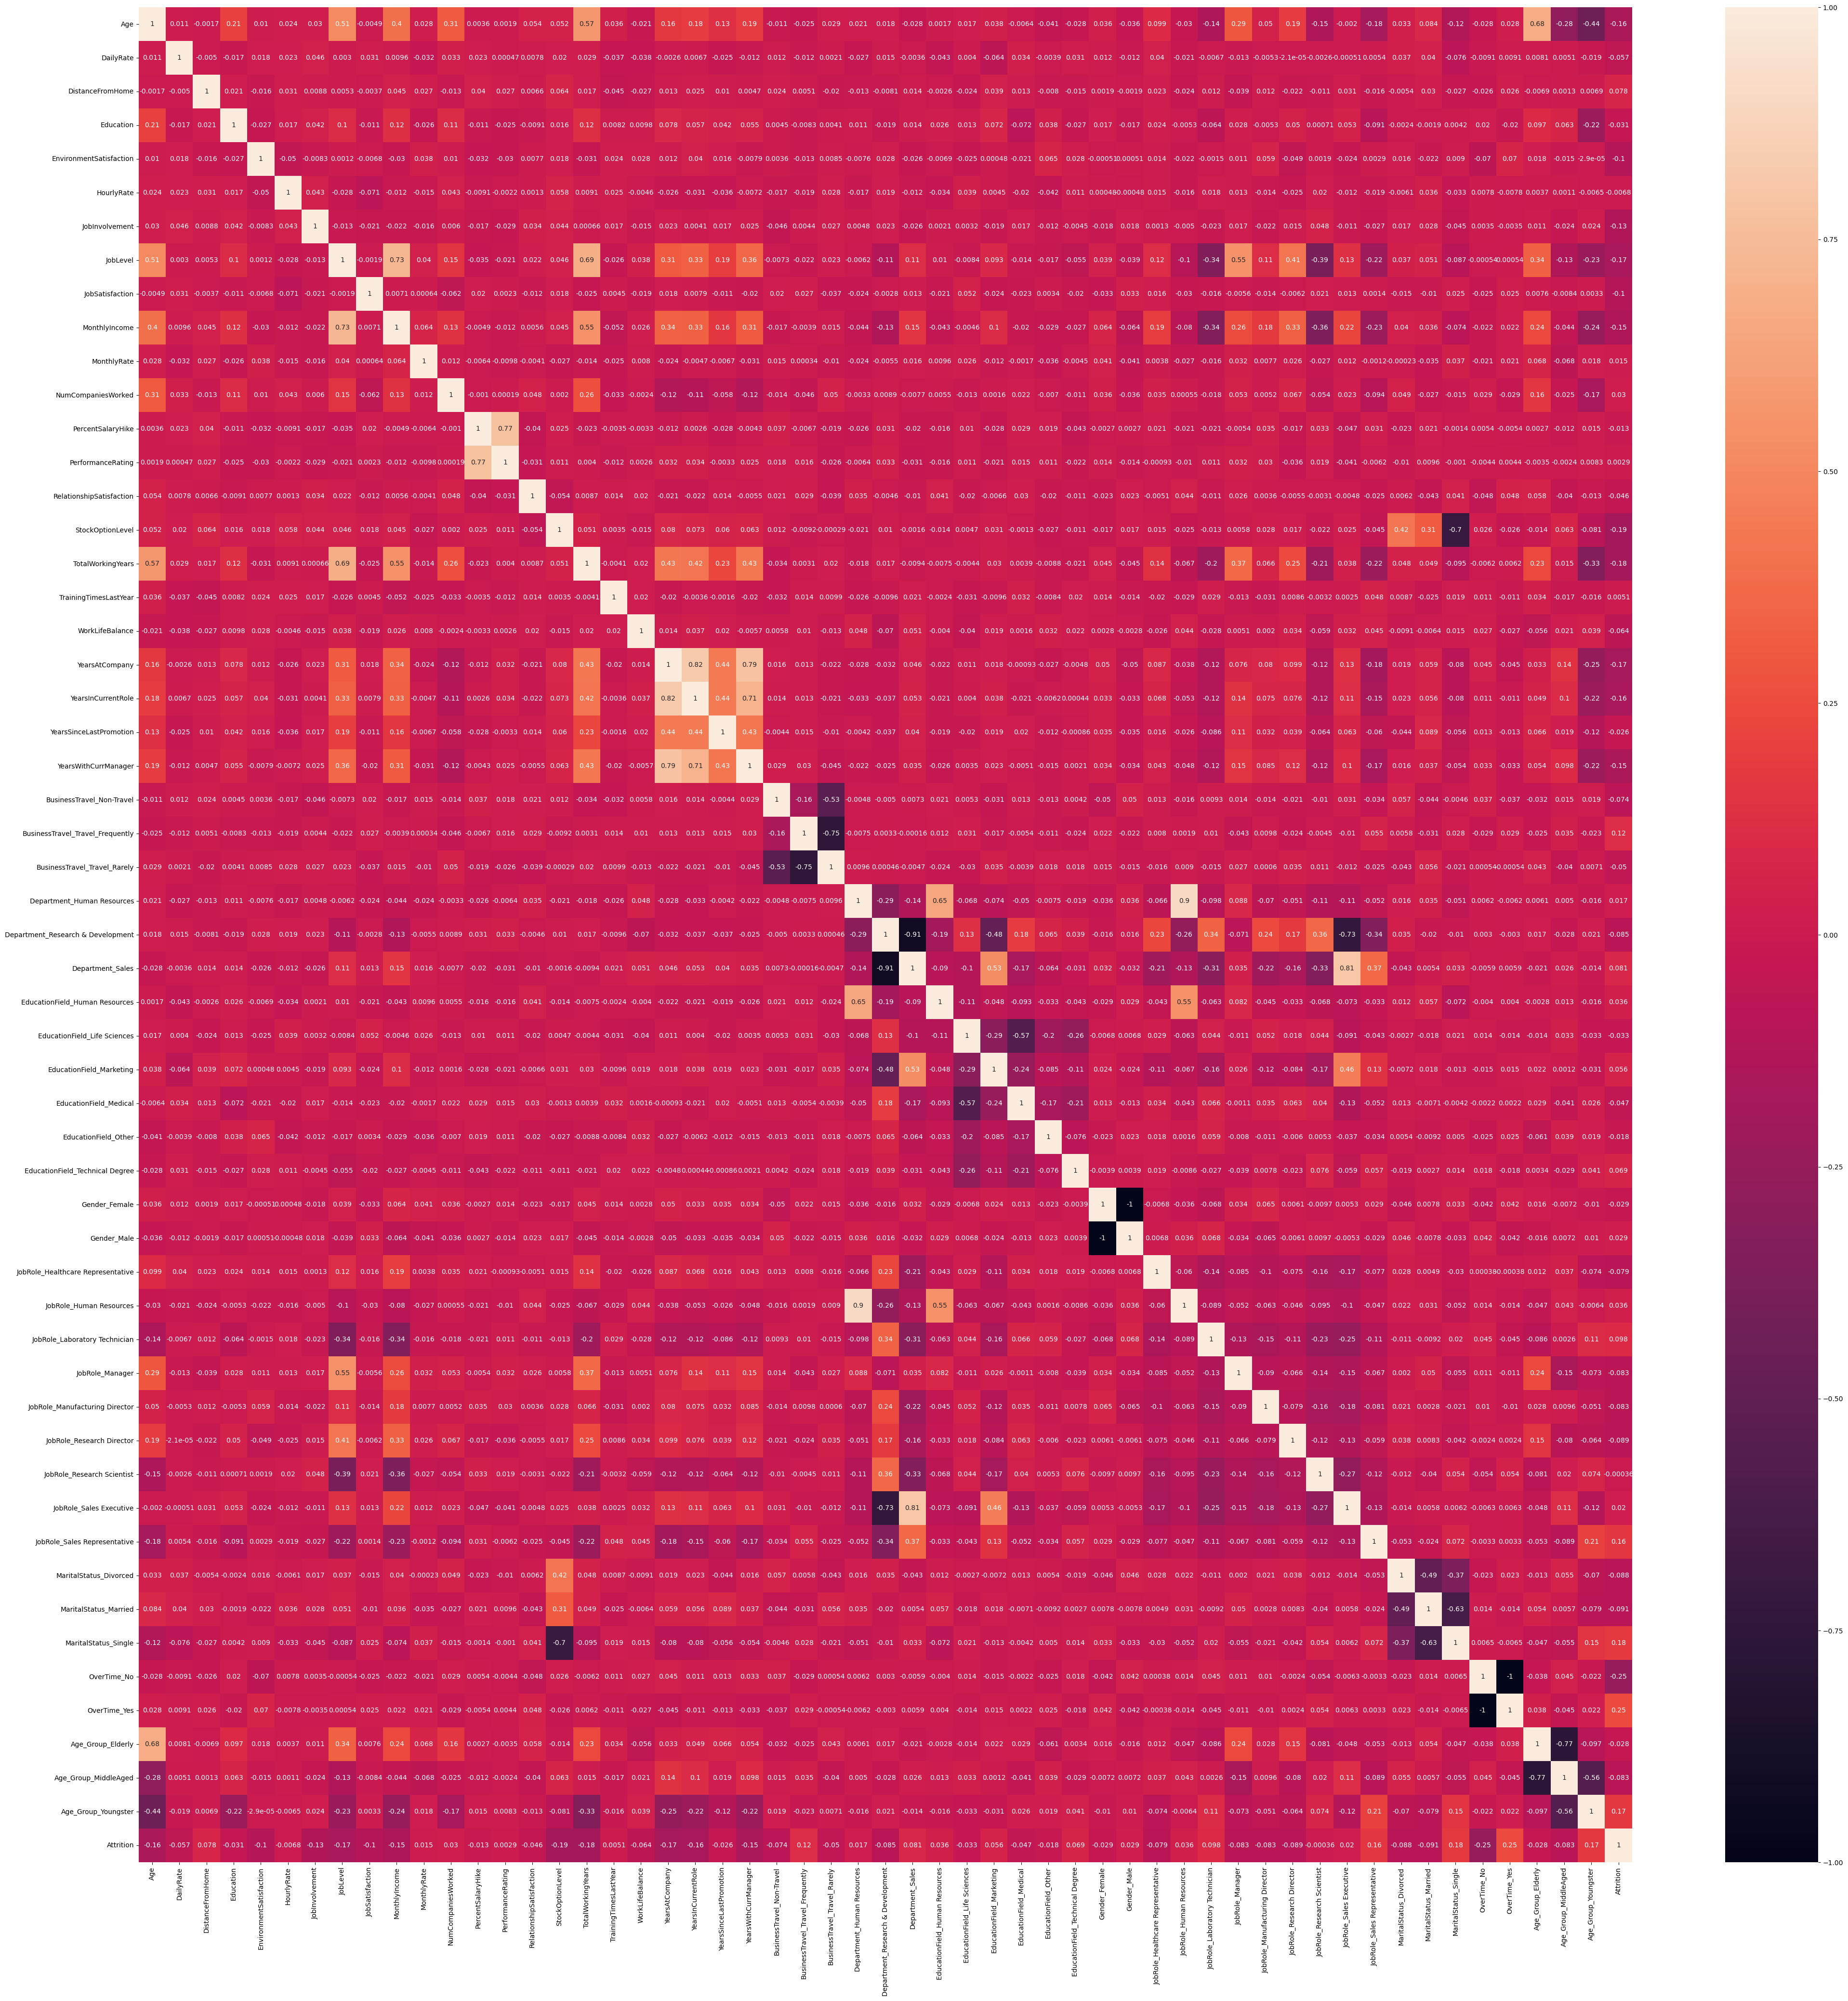

In [24]:
plt.figure(figsize=(50,50))
sb.heatmap(final_df.corr(),annot=True)

# 4.Explore the Data using Exploratory Data Analysis - For pairs of Y and  all Xs

In [25]:
#sb.pairplot(final_df)

In [26]:
final_df.corr()['Attrition']

Age                                 -0.159205
DailyRate                           -0.056652
DistanceFromHome                     0.077924
Education                           -0.031373
EnvironmentSatisfaction             -0.103369
HourlyRate                          -0.006846
JobInvolvement                      -0.130016
JobLevel                            -0.169105
JobSatisfaction                     -0.103481
MonthlyIncome                       -0.146207
MonthlyRate                          0.015170
NumCompaniesWorked                   0.030383
PercentSalaryHike                   -0.013478
PerformanceRating                    0.002889
RelationshipSatisfaction            -0.045872
StockOptionLevel                    -0.186680
TotalWorkingYears                   -0.183018
TrainingTimesLastYear                0.005146
WorkLifeBalance                     -0.063939
YearsAtCompany                      -0.172690
YearsInCurrentRole                  -0.164386
YearsSinceLastPromotion           

In [27]:
final_df.describe()

Age     DailyRate  DistanceFromHome     Education  \
count  1.470000e+03  1.470000e+03      1.470000e+03  1.470000e+03   
mean  -4.017950e-17  7.197568e-17      5.164048e-17  2.697011e-16   
std    1.000340e+00  1.000340e+00      1.000340e+00  1.000340e+00   
min   -2.072192e+00 -1.736576e+00     -1.010909e+00 -1.868426e+00   
25%   -7.581700e-01 -8.366616e-01     -8.875151e-01 -8.916883e-01   
50%   -1.011589e-01 -1.204135e-03     -2.705440e-01  8.504925e-02   
75%    6.653541e-01  8.788772e-01      5.932157e-01  1.061787e+00   
max    2.526886e+00  1.726730e+00      2.444129e+00  2.038524e+00   

       EnvironmentSatisfaction    HourlyRate  JobInvolvement      JobLevel  \
count             1.470000e+03  1.470000e+03    1.470000e+03  1.470000e+03   
mean              7.054070e-17  1.728021e-16   -6.495182e-18  1.479542e-16   
std               1.000340e+00  1.000340e+00    1.000340e+00  1.000340e+00   
min              -1.575686e+00 -1.766079e+00   -2.432006e+00 -9.614864e-01   
25%              -6.605307e-01 -8.803615e-01   -1.026167e+00 -9.614864e-01   
50%               2.546249e-01  5.355811e-03    3.796721e-01 -5.778755e-02   
75%               1.169781e+00  8.787715e-01    3.796721e-01  8.459113e-01   
max               1.169781e+00  1.678377e+00    1.785511e+00  2.653309e+00   

       JobSatisfaction  MonthlyIncome  ...  JobRole_Sales Representative  \
count     1.470000e+03   1.470000e+03  ...                   1470.000000   
mean     -7.816876e-18  -2.004066e-16  ...                      0.056463   
std       1.000340e+00   1.000340e+00  ...                      0.230891   
min      -1.567907e+00  -1.429185e+00  ...                      0.000000   
25%      -6.608532e-01  -8.345415e-01  ...                      0.000000   
50%       2.462002e-01  -2.067581e-01  ...                      0.000000   
75%       1.153254e+00   3.128514e-01  ...                      0.000000   
max       1.153254e+00   3.431134e+00  ...                      1.000000   

       MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
count             1470.000000            1470.000000           1470.000000   
mean                 0.222449               0.457823              0.319728   
std                  0.416033               0.498387              0.466530   
min                  0.000000               0.000000              0.000000   
25%                  0.000000               0.000000              0.000000   
50%                  0.000000               0.000000              0.000000   
75%                  0.000000               1.000000              1.000000   
max                  1.000000               1.000000              1.000000   

       OverTime_No  OverTime_Yes  Age_Group_Elderly  Age_Group_MiddleAged  \
count  1470.000000   1470.000000        1470.000000           1470.000000   
mean      0.717007      0.282993           0.117687              0.816327   
std       0.450606      0.450606           0.322347              0.387349   
min       0.000000      0.000000           0.000000              0.000000   
25%       0.000000      0.000000           0.000000              1.000000   
50%       1.000000      0.000000           0.000000              1.000000   
75%       1.000000      1.000000           0.000000              1.000000   
max       1.000000      1.000000           1.000000              1.000000   

       Age_Group_Youngster    Attrition  
count          1470.000000  1470.000000  
mean              0.065986     0.161224  
std               0.248343     0.367863  
min               0.000000     0.000000  
25%               0.000000     0.000000  
50%               0.000000     0.000000  
75%               0.000000     0.000000  
max               1.000000     1.000000  

[8 rows x 55 columns]

# 5.Visualize all the distribution, relationships

### Visulization of a single column

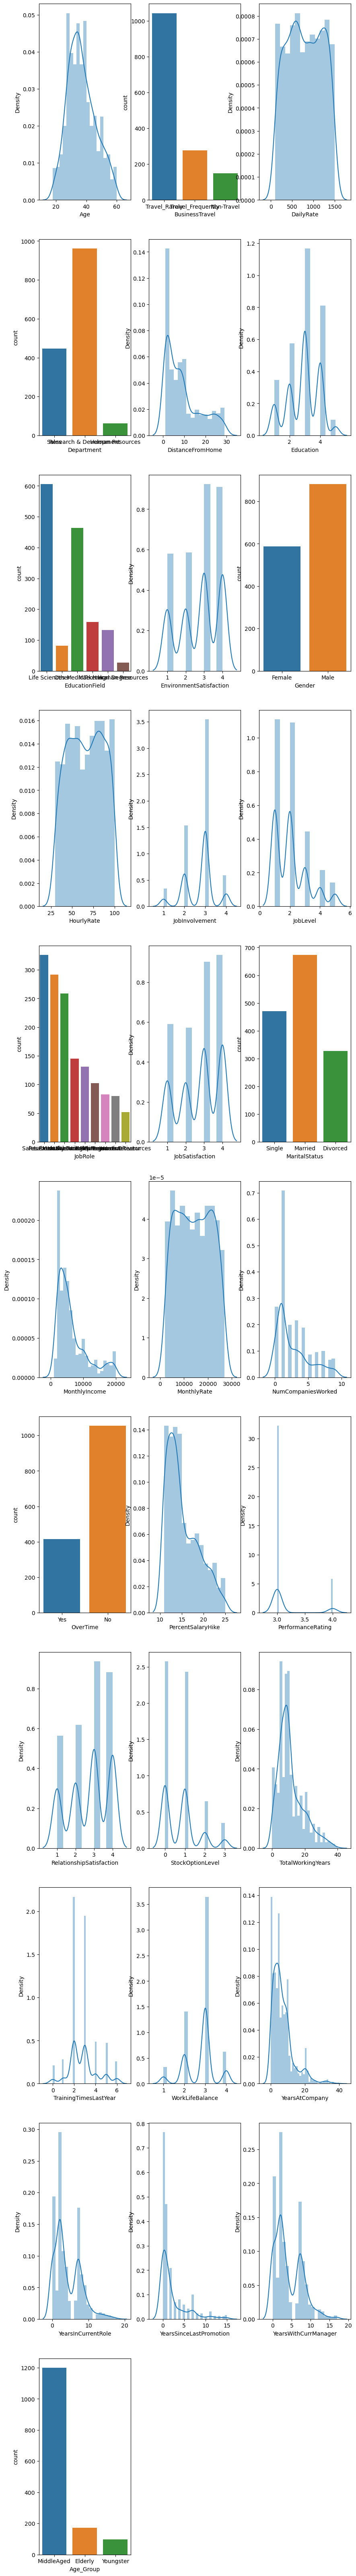

In [28]:
plt.figure(figsize=(10,90))
x=1
for i in df1.columns:
    if(df1[i].dtypes=='object'):
        plt.subplot(12,3,x)
        sb.countplot(df1[i])
        x=x+1
        
    else:
        plt.subplot(12,3,x)
        sb.distplot(df1[i])
        x=x+1
        

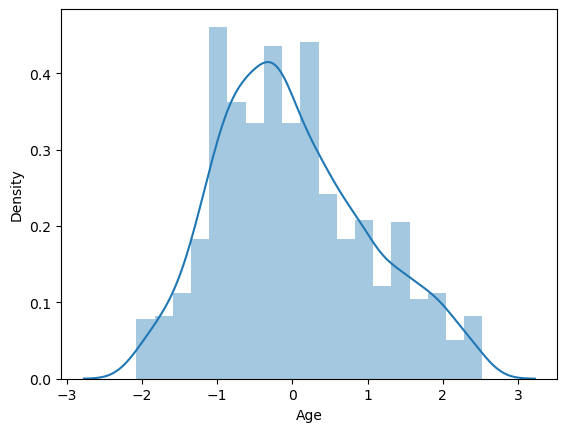

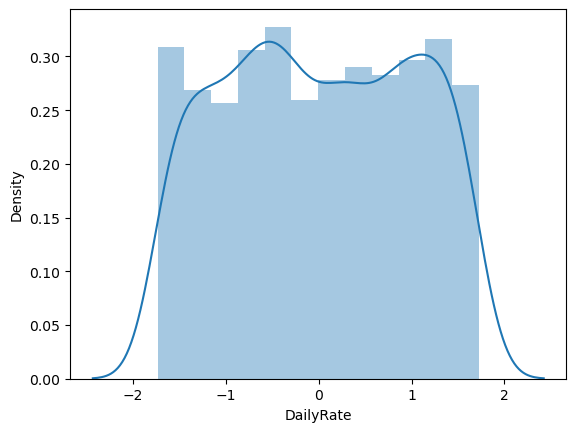

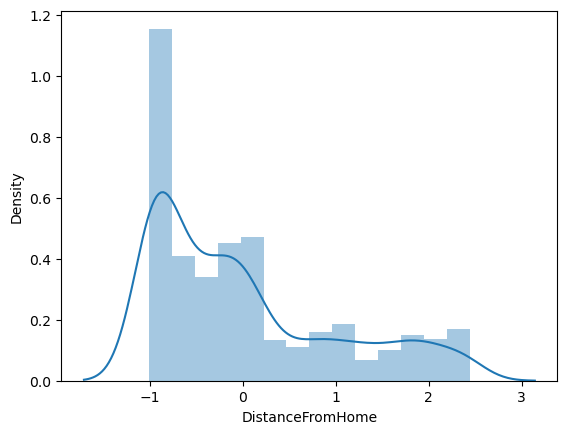

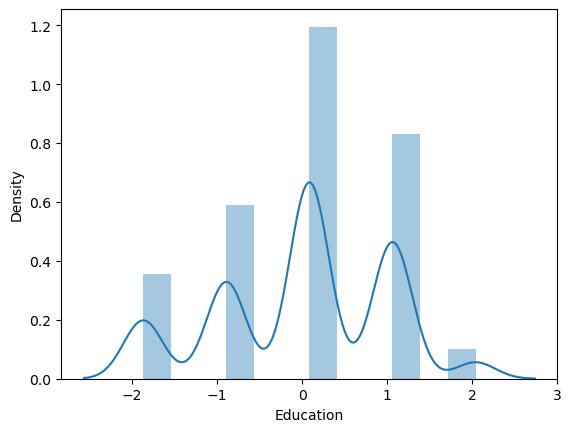

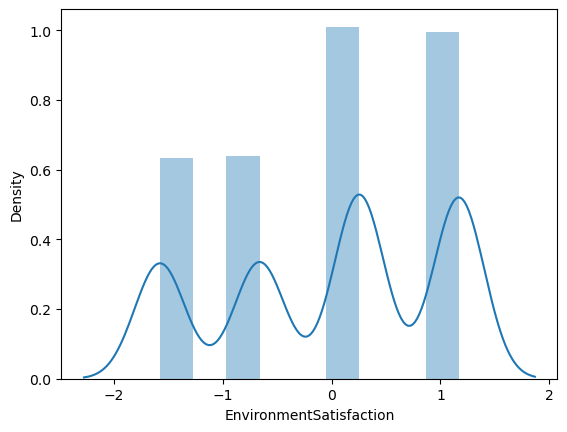

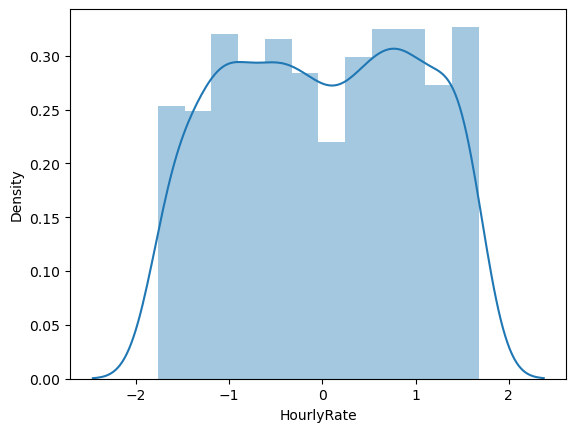

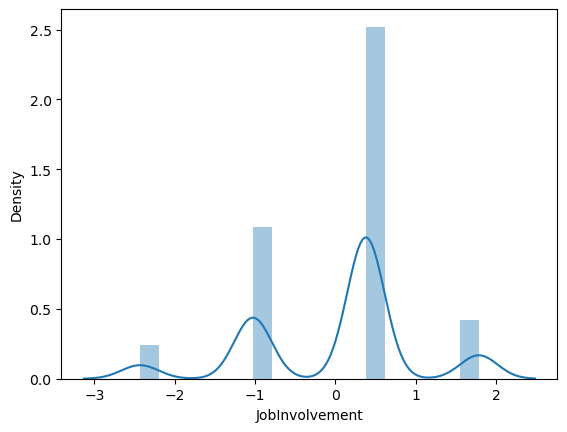

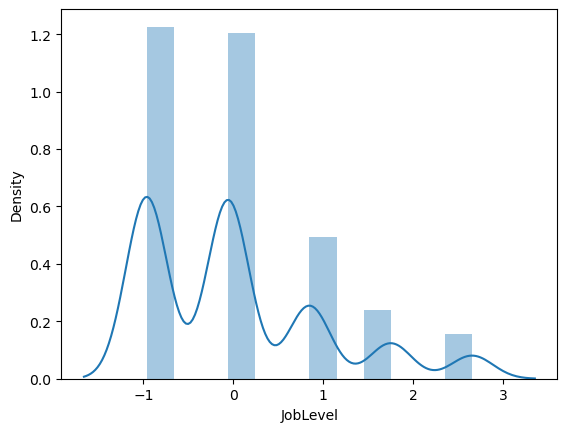

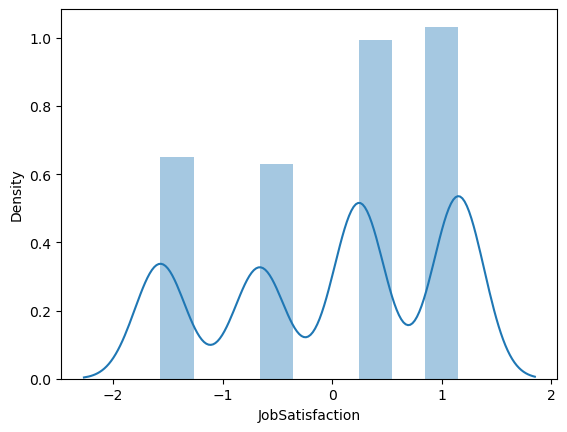

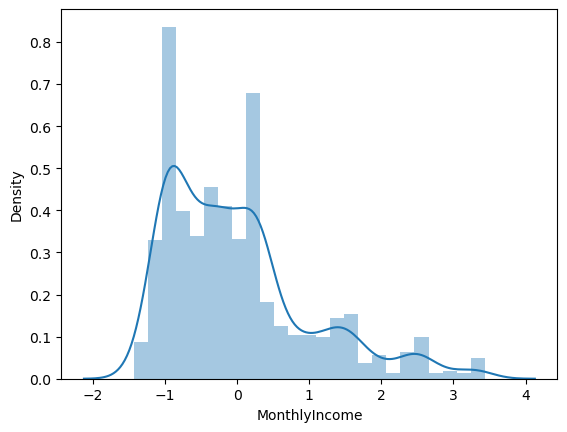

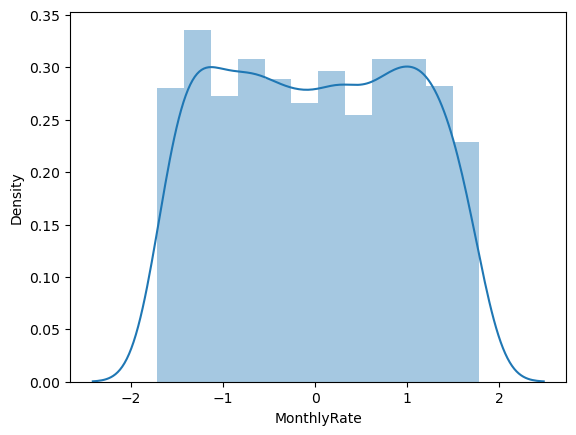

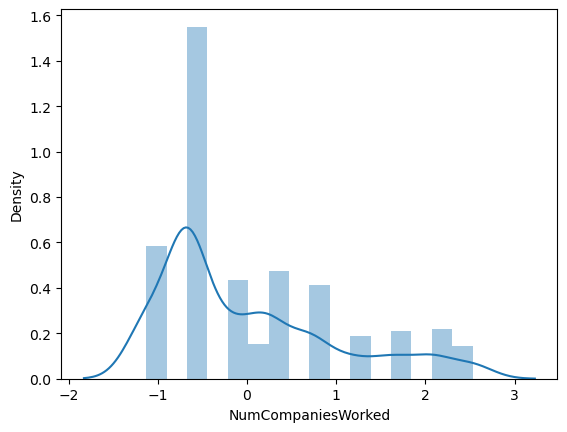

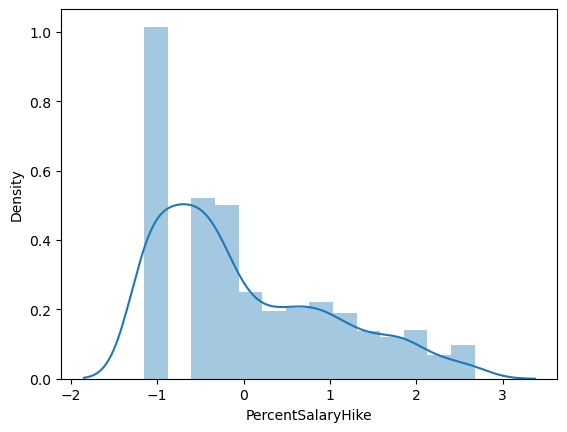

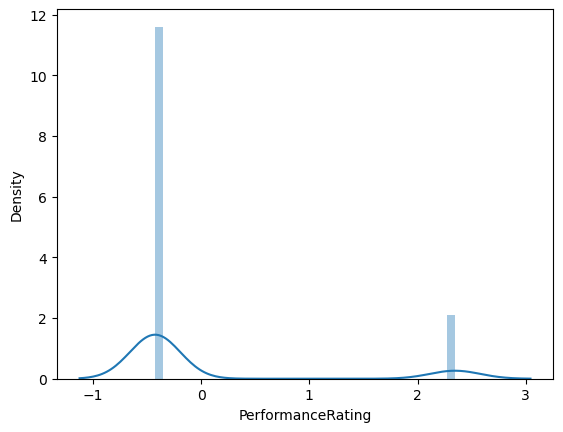

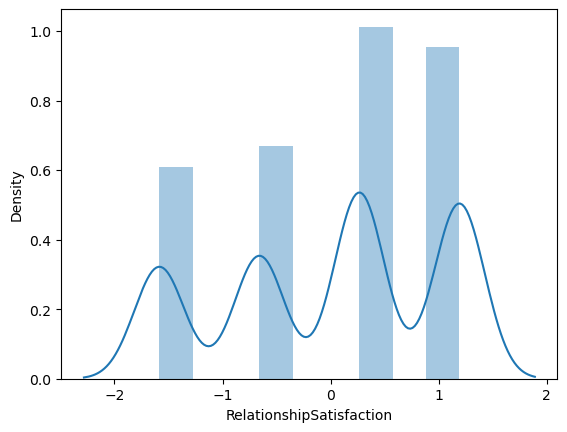

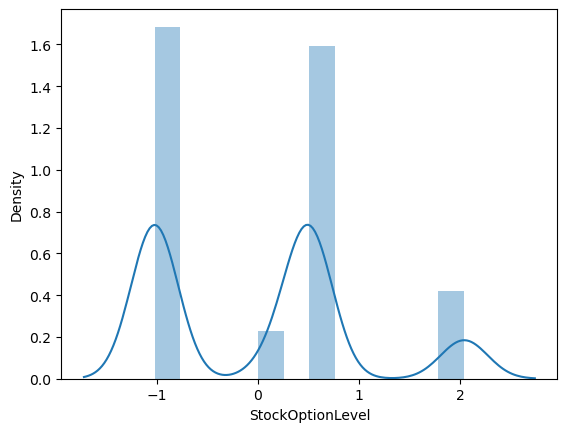

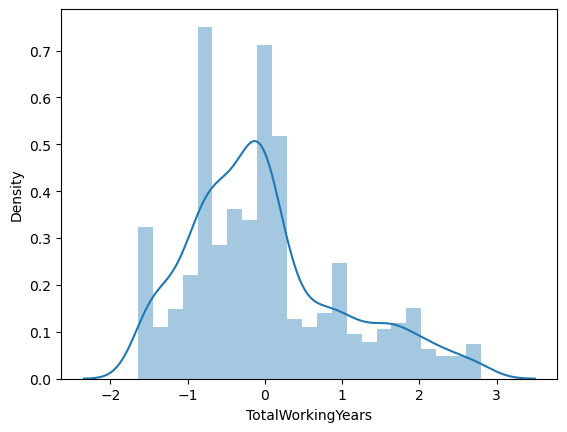

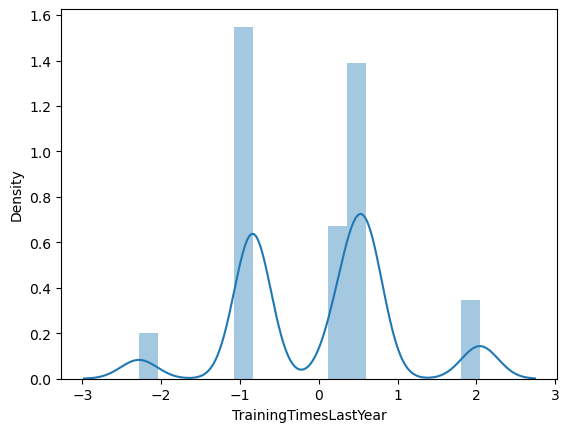

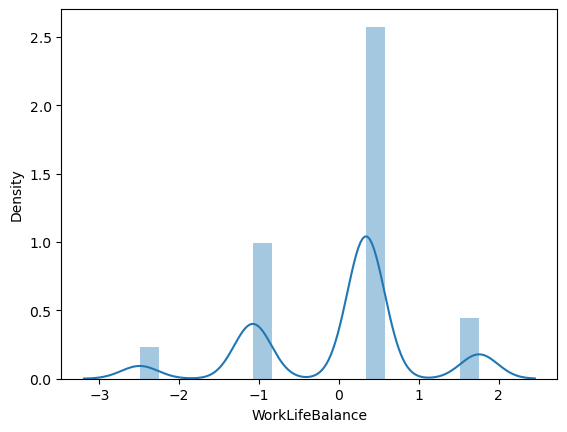

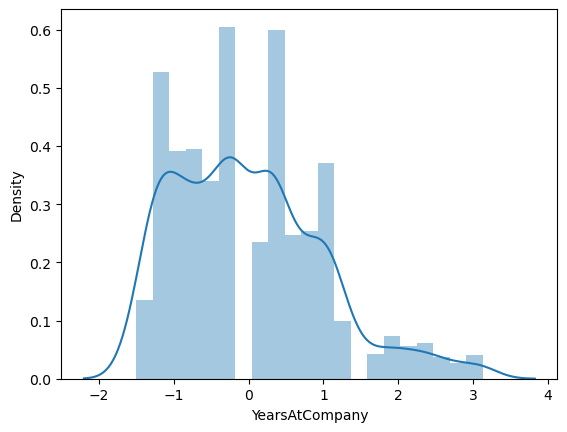

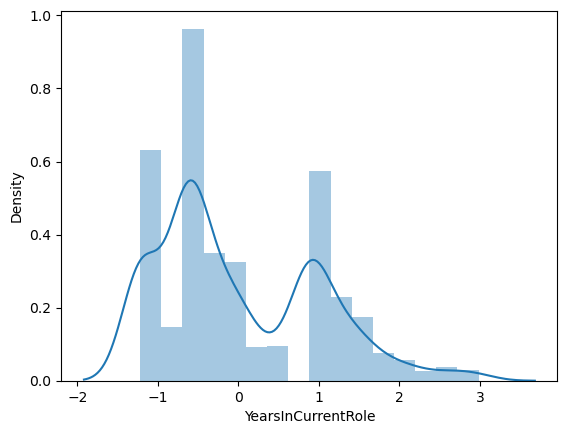

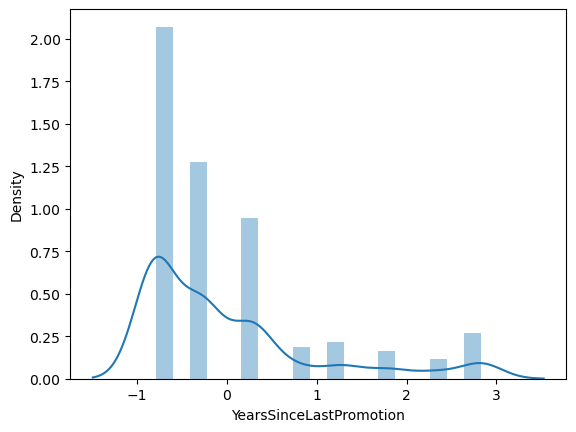

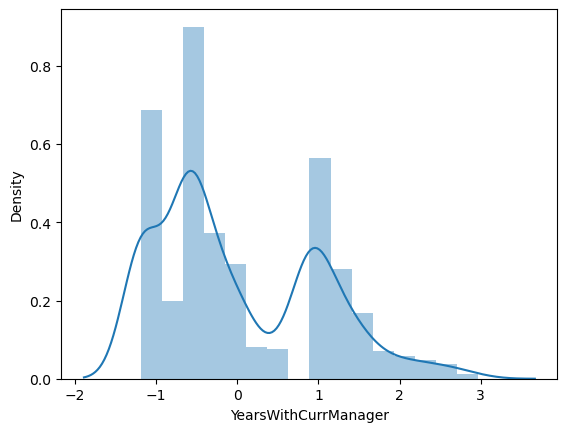

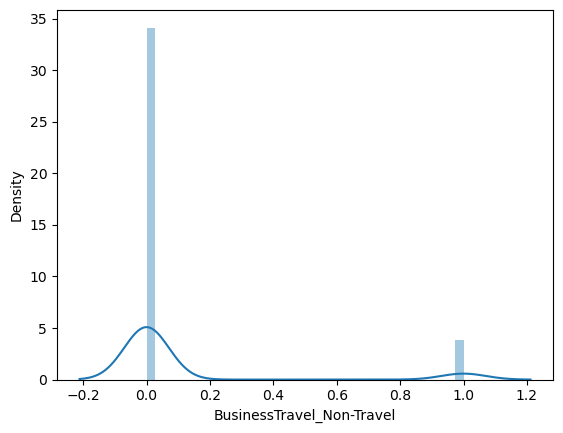

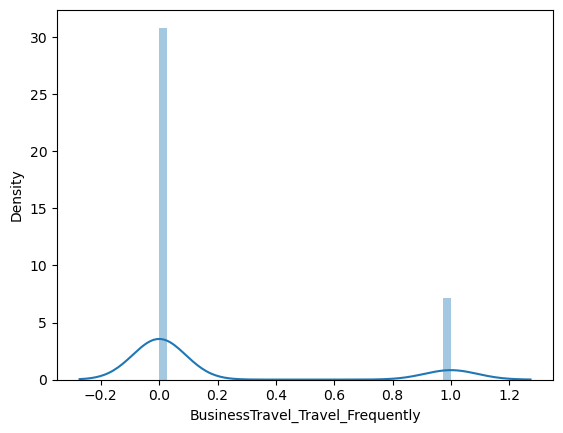

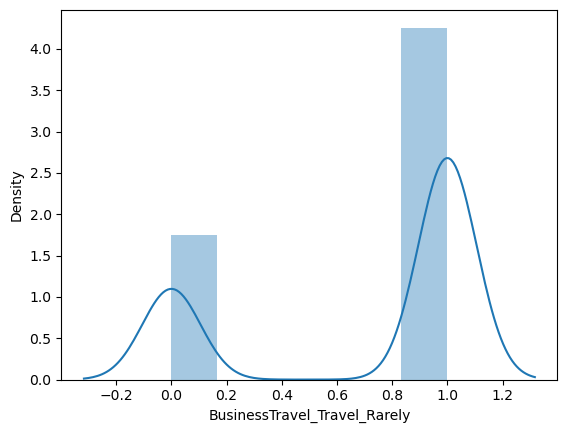

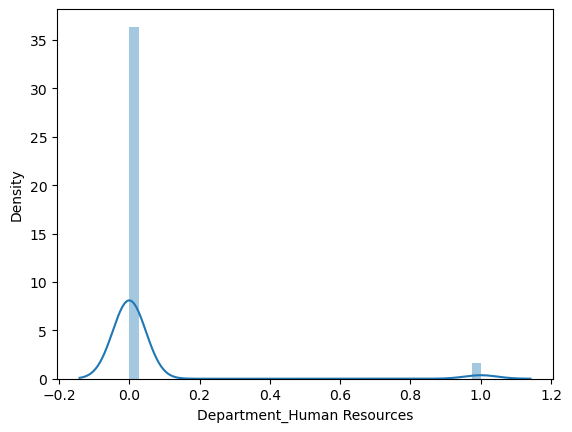

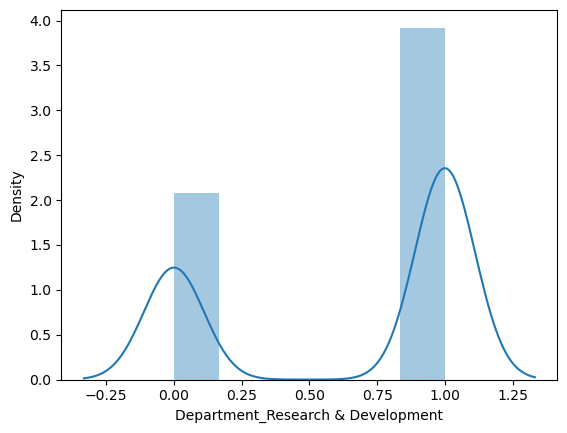

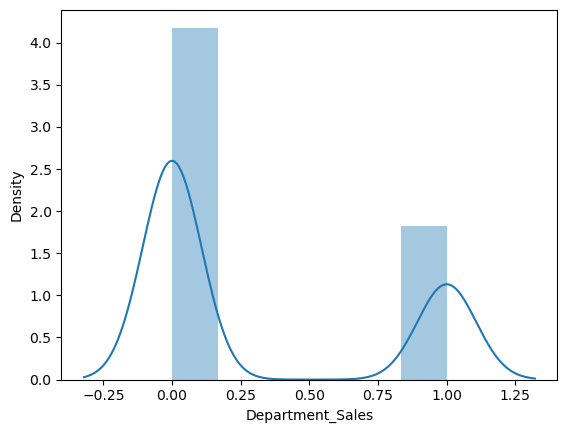

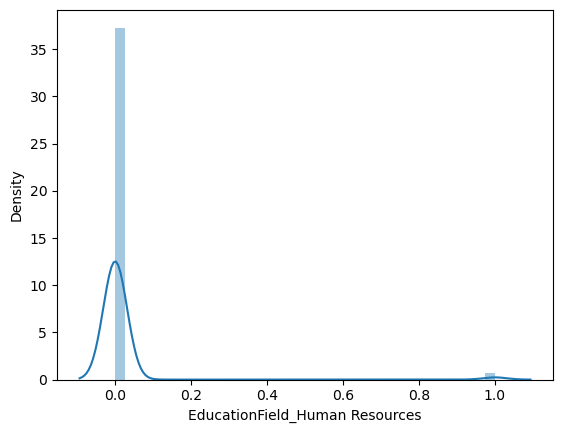

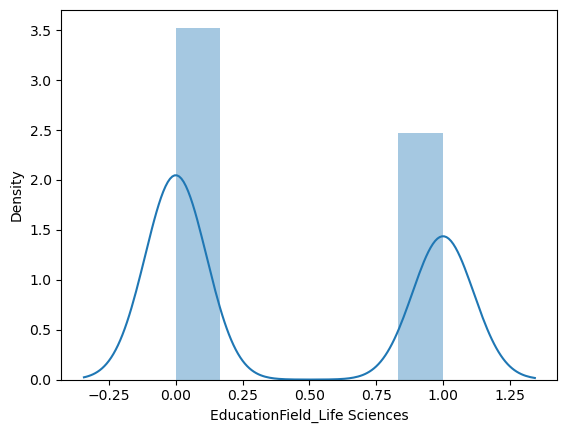

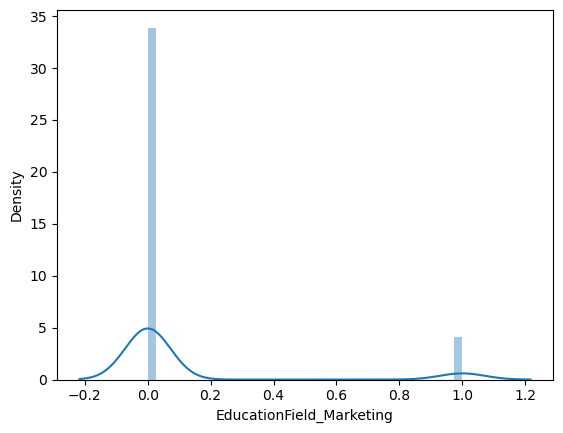

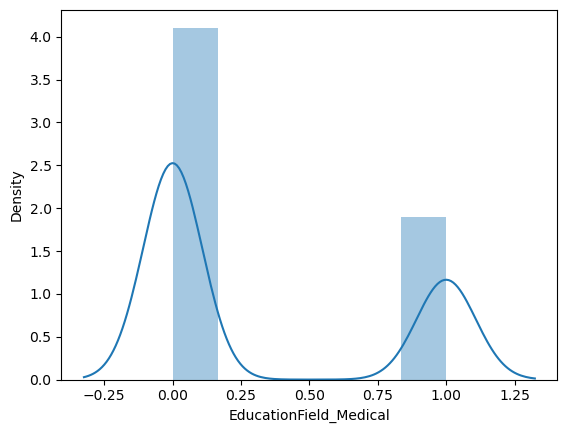

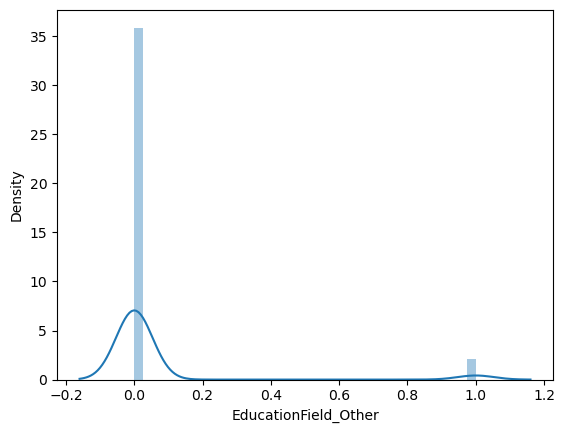

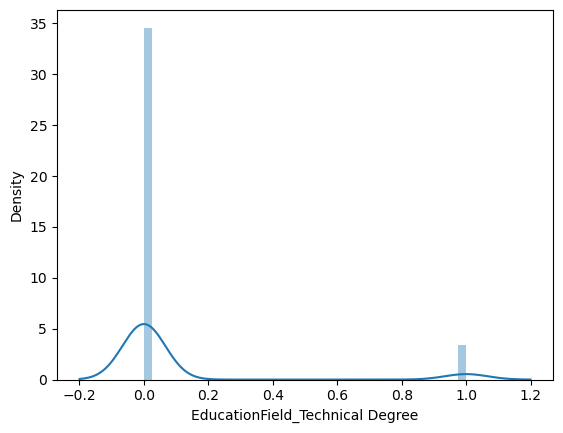

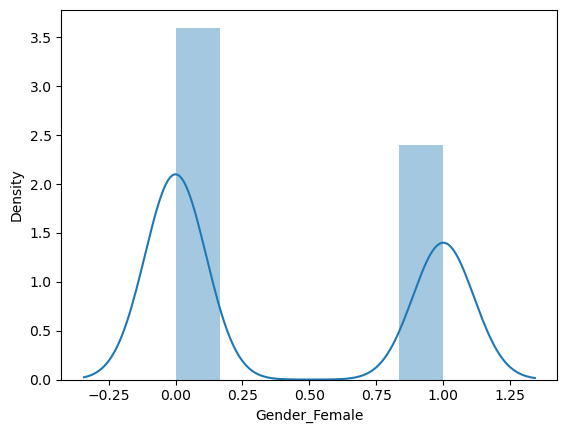

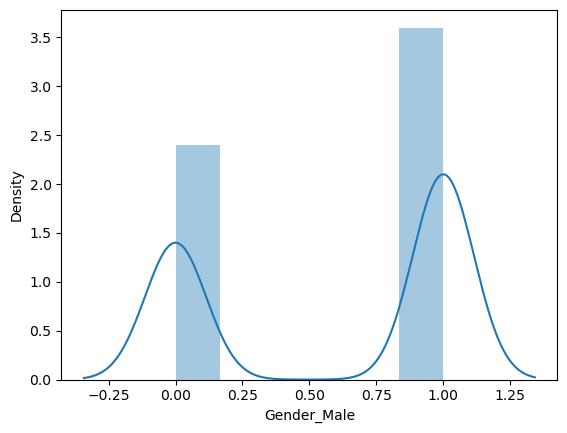

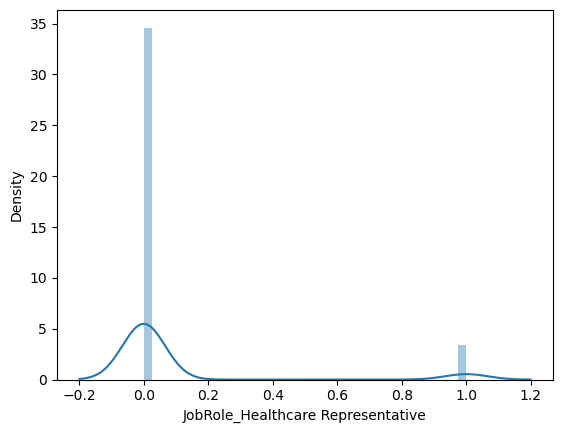

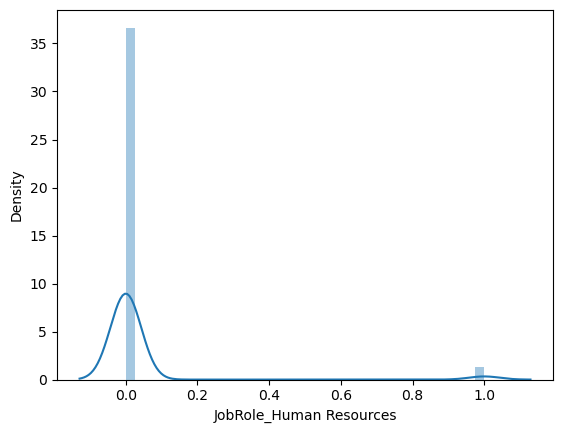

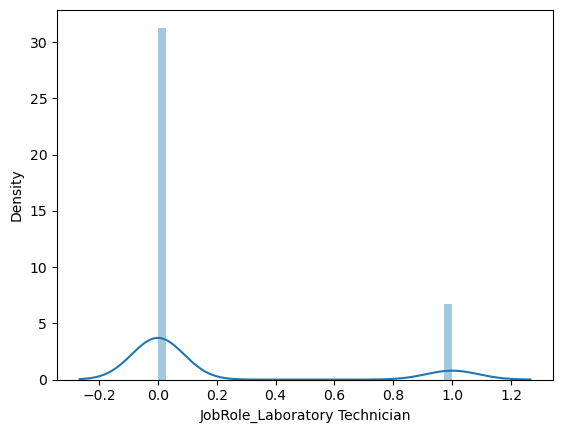

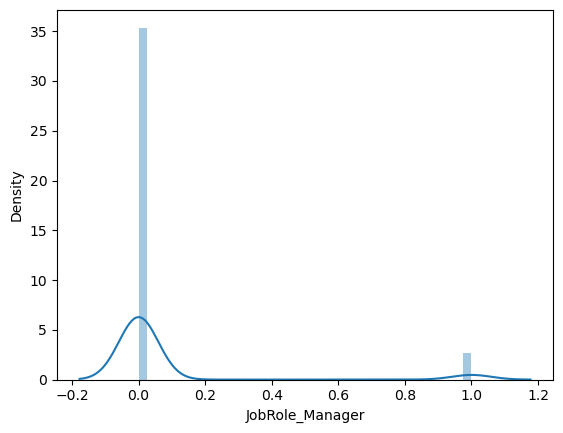

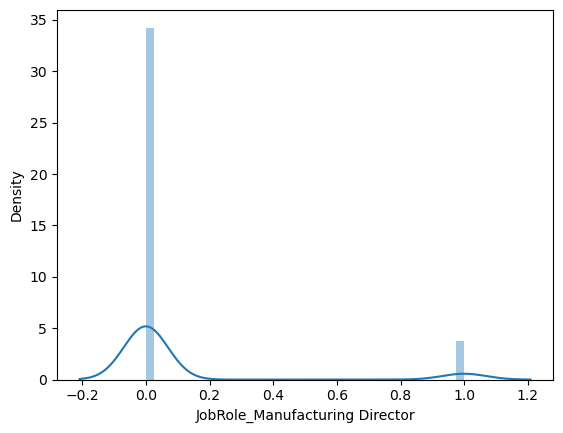

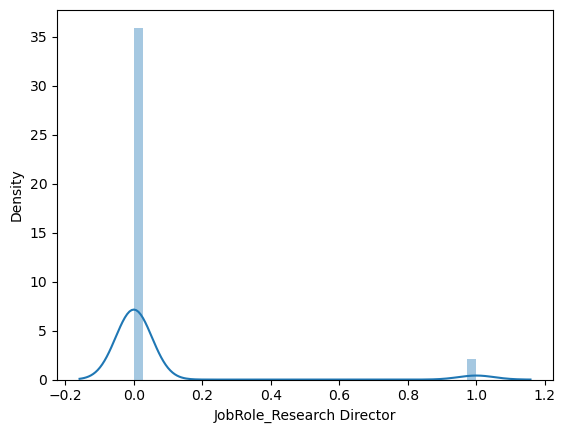

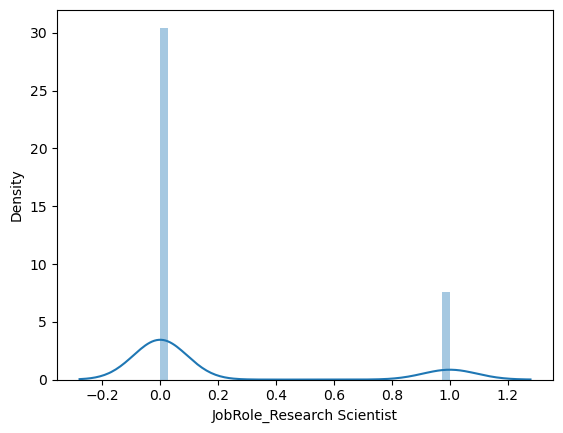

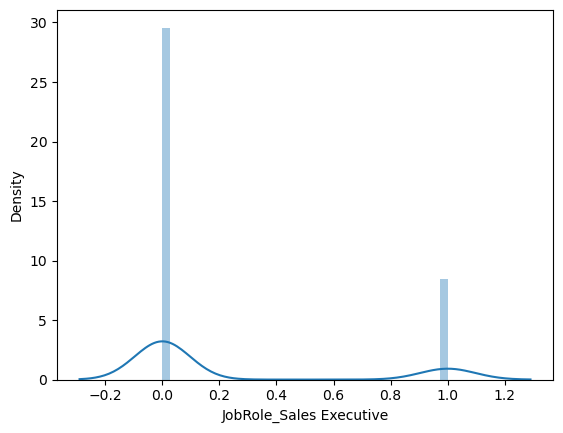

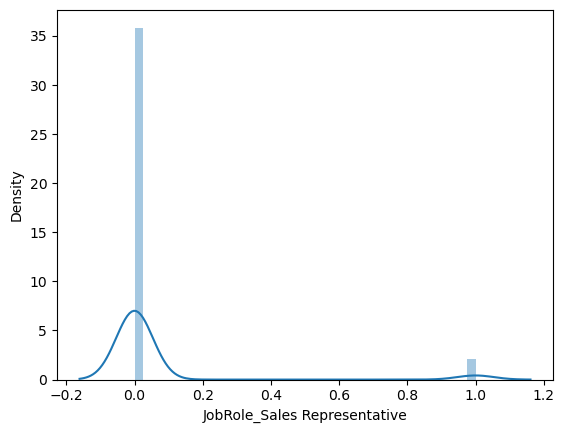

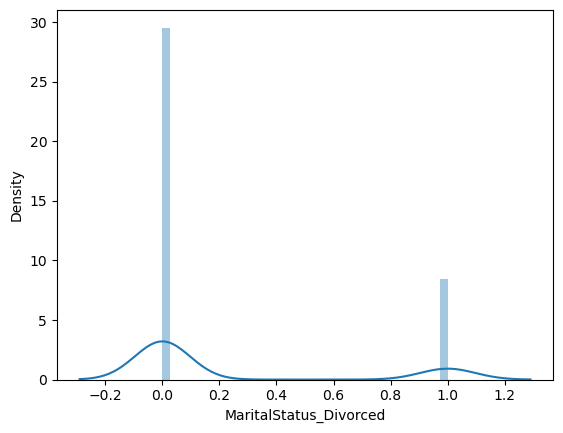

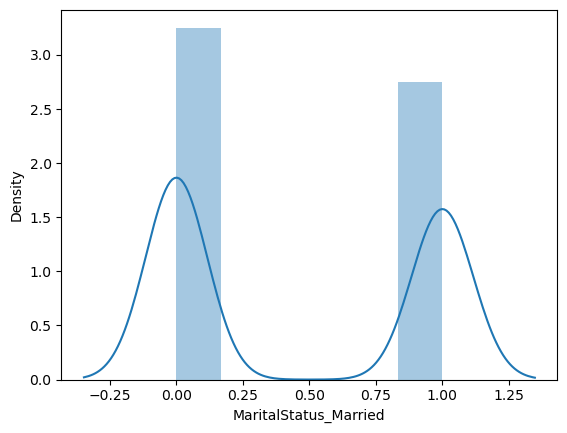

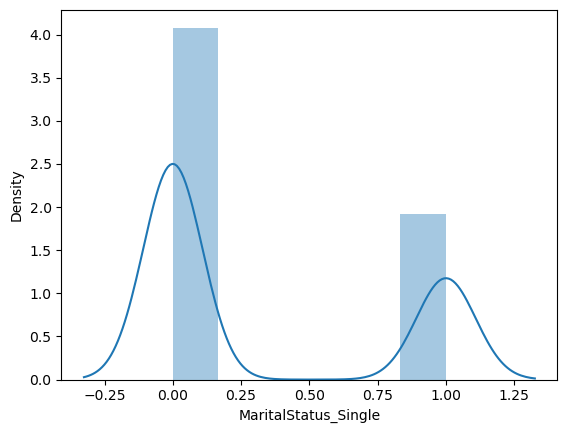

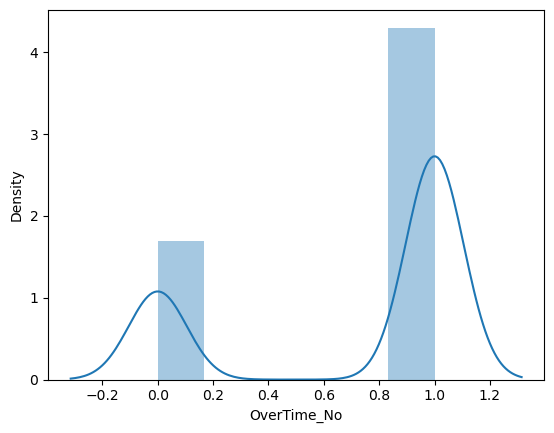

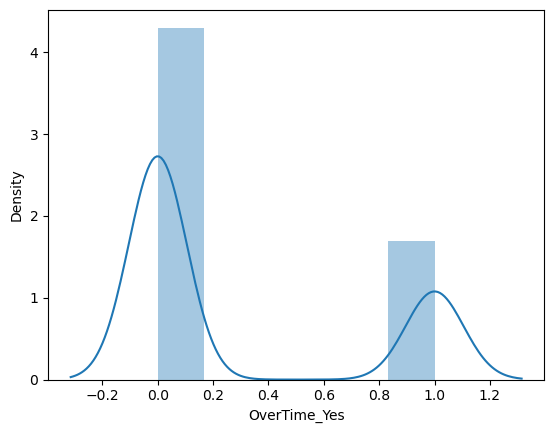

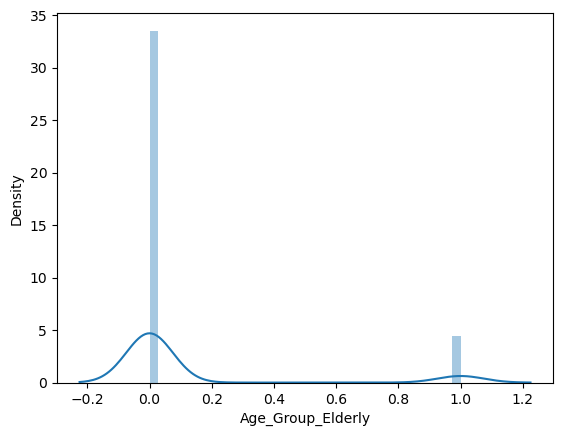

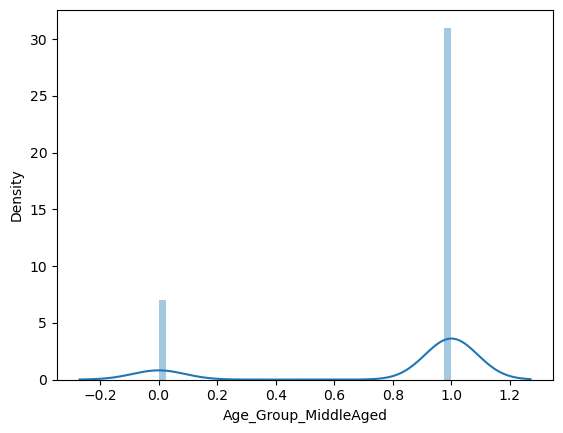

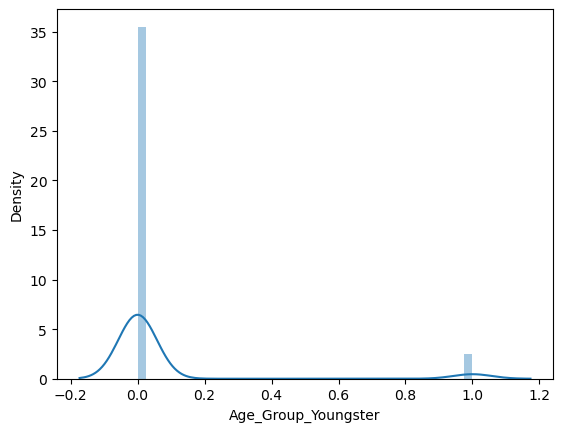

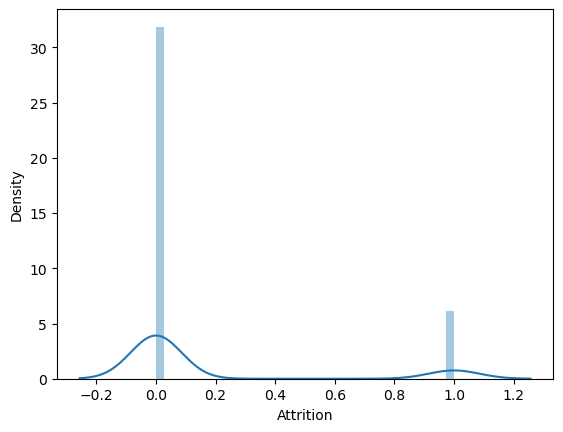

In [29]:
# Here all the graphs are in distribution as final df is merged with OHE and Standardized dataframe
for i in final_df.columns:
    if(final_df[i].dtypes=='object'):
        sb.countplot(final_df[i])
        plt.show()
    else:
        sb.distplot(final_df[i])
        plt.show()


### Visualization of relation between  2 columns using countplot with hue

#### Using scatterplot

<AxesSubplot:xlabel='DailyRate', ylabel='Attrition'>

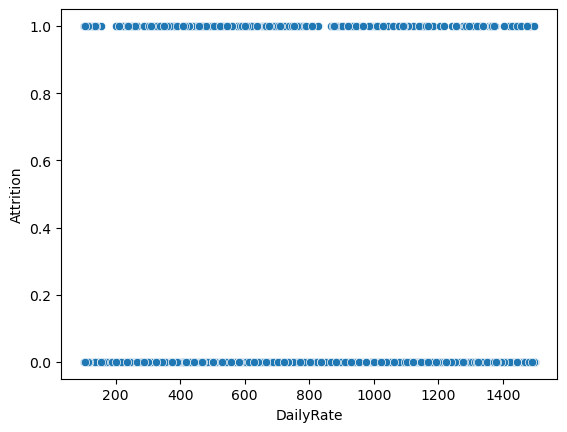

In [30]:
sb.scatterplot(df.DailyRate,df.Attrition)

#### countplot with hue (cat vs cat)

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

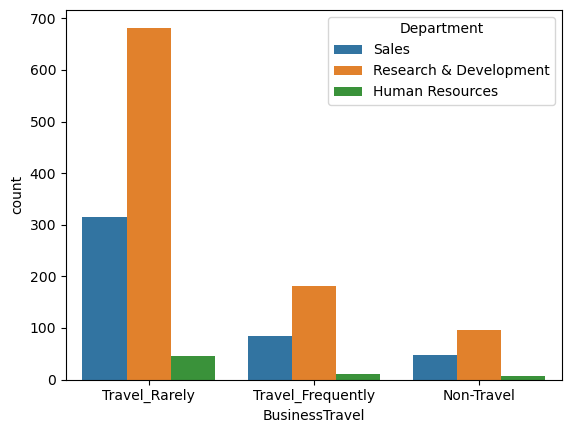

In [31]:
sb.countplot(df.BusinessTravel,hue=df.Department)

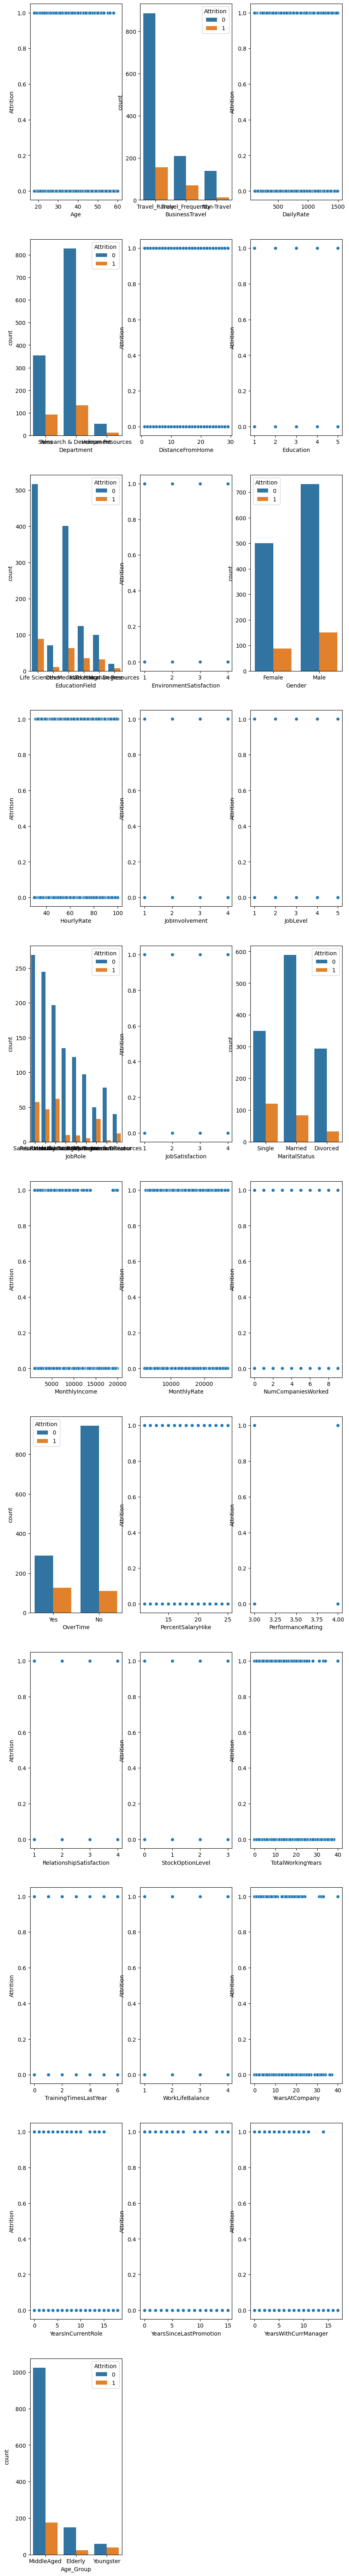

In [32]:
plt.figure(figsize=(10,90))
x=1
for i in df1.columns:
    if(df1[i].dtypes=='object'):
        plt.subplot(12,3,x)
        sb.countplot(df1[i],hue=df['Attrition'])
        x=x+1
        
    else:
        plt.subplot(12,3,x)
        sb.scatterplot(df1[i],df['Attrition'])
        x=x+1
        

### Multivariate analysis

<AxesSubplot:xlabel='EducationField', ylabel='Age'>

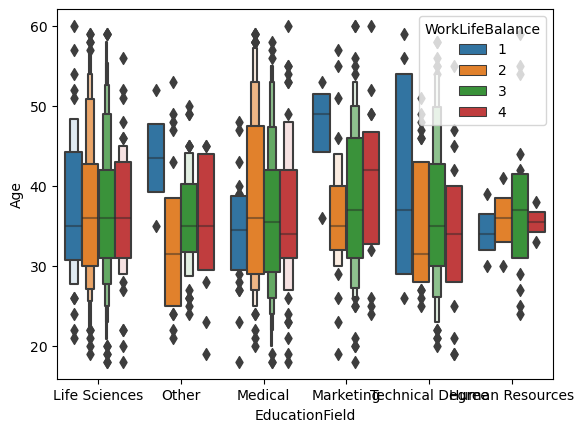

In [33]:
sb.boxenplot(df1.EducationField,df1.Age,hue=df1.WorkLifeBalance)

In [34]:
# sb.pairplot(df)

# 6.Perform Test of Hypothesis - Compare rates for same level male and female, check relationship between categorical variables like Age and Gender/Gender and Education Field, Age and Income, etc

In [35]:
df

Attrition  Age     BusinessTravel  DailyRate              Department  \
0             1   41      Travel_Rarely       1102                   Sales   
1             0   49  Travel_Frequently        279  Research & Development   
2             1   37      Travel_Rarely       1373  Research & Development   
3             0   33  Travel_Frequently       1392  Research & Development   
4             0   27      Travel_Rarely        591  Research & Development   
...         ...  ...                ...        ...                     ...   
1465          0   36  Travel_Frequently        884  Research & Development   
1466          0   39      Travel_Rarely        613  Research & Development   
1467          0   27      Travel_Rarely        155  Research & Development   
1468          0   49  Travel_Frequently       1023                   Sales   
1469          0   34      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2        

In [36]:
from scipy.stats import chi2_contingency

In [37]:
for i in df_cat.columns:
    for j in df_cat.columns:
        df1=pd.crosstab(df_cat[i],df_cat[j])
        chi_sqr, p_value, DOF, EXP  = chi2_contingency(df1)
        if(p_value<0.05):
            print('features are independent -',i,j)
        else:
            print('features are dependent -',i,j)
    print('*'*50)
        

features are independent - BusinessTravel BusinessTravel
features are dependent - BusinessTravel Department
features are dependent - BusinessTravel EducationField
features are dependent - BusinessTravel Gender
features are dependent - BusinessTravel JobRole
features are dependent - BusinessTravel MaritalStatus
features are dependent - BusinessTravel OverTime
features are dependent - BusinessTravel Age_Group
**************************************************
features are dependent - Department BusinessTravel
features are independent - Department Department
features are independent - Department EducationField
features are dependent - Department Gender
features are independent - Department JobRole
features are dependent - Department MaritalStatus
features are dependent - Department OverTime
features are dependent - Department Age_Group
**************************************************
features are dependent - EducationField BusinessTravel
features are independent - EducationField Departm

Note: Here chi_square value is less and p_value>0.05 i.e. categorical columns (e.g.Gender,EducationField) in dataframe are independent of each other.

# 7.Perform Regression treating Monthly Rate as Y, and choose prediction error and the best model

#### a)Use SLR, MLR, Polynomial Regression, Interaction term, Ridge Regression, Lasso etc

# SLR

In [38]:
x_SLR = df[['Age']]   
y_SLR = df[['MonthlyRate']]
x_SLR

Age
0      41
1      49
2      37
3      33
4      27
...   ...
1465   36
1466   39
1467   27
1468   49
1469   34

[1470 rows x 1 columns]

In [39]:
y_SLR

MonthlyRate
0           19479
1           24907
2            2396
3           23159
4           16632
...           ...
1465        12290
1466        21457
1467         5174
1468        13243
1469        10228

[1470 rows x 1 columns]

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
xtrain,xtest,ytrain,ytest = train_test_split(x_SLR,y_SLR,test_size=0.25,random_state=26)

### Model Building and evaluation

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lin_model = LinearRegression()  # instance
lin_model.fit(xtrain,ytrain)

LinearRegression()

In [44]:
lin_model.score(xtrain,ytrain)

0.002654562516247627

In [45]:
lin_model.score(xtest,ytest)

-0.01321805605227544

In [46]:
ypredtest=lin_model.predict(xtest)
ypredtest

array([[13926.73471725],
       [14559.67947138],
       [14005.85281152],
       [13768.49852872],
       [13649.82138732],
       [13966.29376438],
       [14480.56137711],
       [13966.29376438],
       [13808.05757585],
       [14203.64804718],
       [14797.03375417],
       [14322.32518858],
       [13728.93948159],
       [14282.76614145],
       [14124.52995292],
       [14322.32518858],
       [14282.76614145],
       [13847.61662299],
       [13689.38043446],
       [14361.88423571],
       [14243.20709431],
       [14915.71089557],
       [13926.73471725],
       [14361.88423571],
       [14164.08900005],
       [15034.38803697],
       [14005.85281152],
       [13808.05757585],
       [13649.82138732],
       [13610.26234019],
       [14045.41185865],
       [13847.61662299],
       [14361.88423571],
       [13926.73471725],
       [14915.71089557],
       [14520.12042424],
       [14124.52995292],
       [14678.35661277],
       [14480.56137711],
       [14005.85281152],


In [47]:
ytest

MonthlyRate
1402        17536
1223        24164
1415        20439
997         25681
724         24117
...           ...
782          9096
218         16840
285         15881
691         25063
629         23965

[368 rows x 1 columns]

In [48]:
residual=ytest-ypredtest
residual

MonthlyRate
1402   3609.265283
1223   9604.320529
1415   6433.147188
997   11912.501471
724   10467.178613
...            ...
782   -4791.175670
218    2359.438623
285    1716.911000
691   10780.233859
629   10156.942424

[368 rows x 1 columns]

<AxesSubplot:xlabel='Age', ylabel='MonthlyRate'>

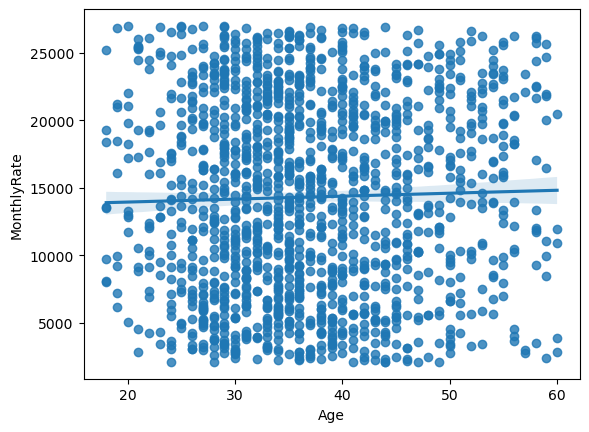

In [49]:
sb.regplot(df.Age,df.MonthlyRate)

## MLR

In [51]:
final_df     #EDA is already performed on the data 

Age  DailyRate  DistanceFromHome  Education  \
0     0.446350   0.742527         -1.010909  -0.891688   
1     1.322365  -1.297775         -0.147150  -1.868426   
2     0.008343   1.414363         -0.887515  -0.891688   
3    -0.429664   1.461466         -0.764121   1.061787   
4    -1.086676  -0.524295         -0.887515  -1.868426   
...        ...        ...               ...        ...   
1465 -0.101159   0.202082          1.703764  -0.891688   
1466  0.227347  -0.469754         -0.393938  -1.868426   
1467 -1.086676  -1.605183         -0.640727   0.085049   
1468  1.322365   0.546677         -0.887515   0.085049   
1469 -0.320163  -0.432568         -0.147150   0.085049   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                   -0.660531    1.383138        0.379672 -0.057788   
1                    0.254625   -0.240677       -1.026167 -0.057788   
2                    1.169781    1.284725       -1.026167 -0.961486   
3                    1.169781   -0.486709        0.379672 -0.961486   
4                   -1.575686   -1.274014        0.379672 -0.961486   
...                       ...         ...             ...       ...   
1465                 0.254625   -1.224807        1.785511 -0.057788   
1466                 1.169781   -1.175601       -1.026167  0.845911   
1467                -0.660531    1.038693        1.785511 -0.057788   
1468                 1.169781   -0.142264       -1.026167 -0.057788   
1469                -0.660531    0.792660        1.785511 -0.057788   

      JobSatisfaction  MonthlyIncome  ...  JobRole_Sales Representative  \
0            1.153254       0.129018  ...                             0   
1           -0.660853      -0.140791  ...                             0   
2            0.246200      -1.091220  ...                             0   
3            0.246200      -0.835167  ...                             0   
4           -0.660853      -0.660400  ...                             0   
...               ...            ...  ...                           ...   
1465         1.153254      -0.940839  ...                             0   
1466        -1.567907       1.378958  ...                             0   
1467        -0.660853       0.175602  ...                             0   
1468        -0.660853      -0.059504  ...                             0   
1469         0.246200      -0.367768  ...                             0   

      MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
0                          0                      0                     1   
1                          0                      1                     0   
2                          0                      0                     1   
3                          0                      1                     0   
4                          0                      1                     0   
...                      ...                    ...                   ...   
1465                       0                      1                     0   
1466                       0                      1                     0   
1467                       0                      1                     0   
1468                       0                      1                     0   
1469                       0                      1                     0   

      OverTime_No  OverTime_Yes  Age_Group_Elderly  Age_Group_MiddleAged  \
0               0             1                  0                     1   
1               1             0                  0                     1   
2               0             1                  0                     1   
3               0             1                  0                     1   
4               1             0                  0                     1   
...           ...           ...                ...                   ...   
1465            1             0                  0                     1   
1466            1          

### Linearity

In [52]:
final_df.corr()['MonthlyRate']

Age                                  0.028051
DailyRate                           -0.032182
DistanceFromHome                     0.027473
Education                           -0.026084
EnvironmentSatisfaction              0.037600
HourlyRate                          -0.015297
JobInvolvement                      -0.016322
JobLevel                             0.039563
JobSatisfaction                      0.000644
MonthlyIncome                        0.064353
MonthlyRate                          1.000000
NumCompaniesWorked                   0.011853
PercentSalaryHike                   -0.006429
PerformanceRating                   -0.009811
RelationshipSatisfaction            -0.004085
StockOptionLevel                    -0.026864
TotalWorkingYears                   -0.014390
TrainingTimesLastYear               -0.025182
WorkLifeBalance                      0.007963
YearsAtCompany                      -0.023551
YearsInCurrentRole                  -0.004665
YearsSinceLastPromotion           

In [53]:
nonCorrelatedWithSalePrice=[i for i in final_df if abs(final_df[i].corr(final_df['MonthlyRate']))<0.02]
df_linearity=final_df.drop(nonCorrelatedWithSalePrice,axis=1)
df_linearity.head(3)

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0  0.446350   0.742527         -1.010909  -0.891688                -0.660531   
1  1.322365  -1.297775         -0.147150  -1.868426                 0.254625   
2  0.008343   1.414363         -0.887515  -0.891688                 1.169781   

   JobLevel  MonthlyIncome  MonthlyRate  StockOptionLevel  \
0 -0.057788       0.129018     0.726020         -1.018674   
1 -0.057788      -0.140791     1.488876          0.510149   
2 -0.961486      -1.091220    -1.674841         -1.018674   

   TrainingTimesLastYear  ...  JobRole_Human Resources  JobRole_Manager  \
0               0.312607  ...                        0                0   
1               0.601911  ...                        0                0   
2               0.601911  ...                        0                0   

   JobRole_Research Director  JobRole_Research Scientist  \
0                          0                           0   
1                          0                           1   
2                          0                           0   

   MaritalStatus_Married  MaritalStatus_Single  OverTime_No  OverTime_Yes  \
0                      0                     1            0             1   
1                      1                     0            1             0   
2                      0                     1            0             1   

   Age_Group_Elderly  Age_Group_MiddleAged  
0                  0                     1  
1                  0                     1  
2                  0                     1  

[3 rows x 27 columns]

### multicolinearity

In [54]:
y1=df[['MonthlyRate']]
y1

MonthlyRate
0           19479
1           24907
2            2396
3           23159
4           16632
...           ...
1465        12290
1466        21457
1467         5174
1468        13243
1469        10228

[1470 rows x 1 columns]

In [55]:
df_multicolinearity=df_linearity.drop('MonthlyRate',axis=1)
df_multicolinearity.head(3)

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0  0.446350   0.742527         -1.010909  -0.891688                -0.660531   
1  1.322365  -1.297775         -0.147150  -1.868426                 0.254625   
2  0.008343   1.414363         -0.887515  -0.891688                 1.169781   

   JobLevel  MonthlyIncome  StockOptionLevel  TrainingTimesLastYear  \
0 -0.057788       0.129018         -1.018674               0.312607   
1 -0.057788      -0.140791          0.510149               0.601911   
2 -0.961486      -1.091220         -1.018674               0.601911   

   YearsAtCompany  ...  JobRole_Human Resources  JobRole_Manager  \
0        0.041137  ...                        0                0   
1        1.069787  ...                        0                0   
2       -1.501837  ...                        0                0   

   JobRole_Research Director  JobRole_Research Scientist  \
0                          0                           0   
1                          0                           1   
2                          0                           0   

   MaritalStatus_Married  MaritalStatus_Single  OverTime_No  OverTime_Yes  \
0                      0                     1            0             1   
1                      1                     0            1             0   
2                      0                     1            0             1   

   Age_Group_Elderly  Age_Group_MiddleAged  
0                  0                     1  
1                  0                     1  
2                  0                     1  

[3 rows x 26 columns]

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
vif=pd.DataFrame()
vif['Features']=df_multicolinearity.columns
vif['VIF']= [variance_inflation_factor(df_multicolinearity.values,i) for i in range(df_multicolinearity.shape[1])]
vif

#Since all the VIF values are less 10 we are not removing any columns

Features       VIF
0                            Age  2.917617
1                      DailyRate  1.012803
2               DistanceFromHome  1.018914
3                      Education  1.085761
4        EnvironmentSatisfaction  1.021580
5                       JobLevel  4.507420
6                  MonthlyIncome  2.412661
7               StockOptionLevel  2.139268
8          TrainingTimesLastYear  1.016613
9                 YearsAtCompany  2.785614
10          YearsWithCurrManager  2.771384
11    Department_Human Resources  6.218680
12  EducationField_Life Sciences  1.057487
13          EducationField_Other  1.060245
14                 Gender_Female       inf
15                   Gender_Male       inf
16       JobRole_Human Resources  6.256515
17               JobRole_Manager  1.956815
18     JobRole_Research Director  1.468964
19    JobRole_Research Scientist  1.262517
20         MaritalStatus_Married  1.774290
21          MaritalStatus_Single  3.261448
22                   OverTime_No       inf
23                  OverTime_Yes       inf
24             Age_Group_Elderly  5.811093
25          Age_Group_MiddleAged  3.589265

In [58]:
featurestodrop = vif.loc[vif['VIF']>10]
droplist = featurestodrop['Features']
droplist = list(droplist)
len(droplist)
print(droplist)


['Gender_Female', 'Gender_Male', 'OverTime_No', 'OverTime_Yes']


In [59]:
df_after_multiCo=df_multicolinearity.drop(droplist,axis=1)
df_after_multiCo.head(3)
# df_after_multiCo.drop(['EmployeeCount','StandardHours'],axis=1)

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0  0.446350   0.742527         -1.010909  -0.891688                -0.660531   
1  1.322365  -1.297775         -0.147150  -1.868426                 0.254625   
2  0.008343   1.414363         -0.887515  -0.891688                 1.169781   

   JobLevel  MonthlyIncome  StockOptionLevel  TrainingTimesLastYear  \
0 -0.057788       0.129018         -1.018674               0.312607   
1 -0.057788      -0.140791          0.510149               0.601911   
2 -0.961486      -1.091220         -1.018674               0.601911   

   YearsAtCompany  ...  EducationField_Life Sciences  EducationField_Other  \
0        0.041137  ...                             1                     0   
1        1.069787  ...                             1                     0   
2       -1.501837  ...                             0                     1   

   JobRole_Human Resources  JobRole_Manager  JobRole_Research Director  \
0                        0                0                          0   
1                        0                0                          0   
2                        0                0                          0   

   JobRole_Research Scientist  MaritalStatus_Married  MaritalStatus_Single  \
0                           0                      0                     1   
1                           1                      1                     0   
2                           0                      0                     1   

   Age_Group_Elderly  Age_Group_MiddleAged  
0                  0                     1  
1                  0                     1  
2                  0                     1  

[3 rows x 22 columns]

#### Splitting of data

In [60]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [61]:
xtrain,xtest,ytrain,ytest=train_test_split(df_after_multiCo,y1,test_size=0.25,random_state=26)

In [62]:
ytest

MonthlyRate
1402        17536
1223        24164
1415        20439
997         25681
724         24117
...           ...
782          9096
218         16840
285         15881
691         25063
629         23965

[368 rows x 1 columns]

In [63]:
xtest

Age  DailyRate  DistanceFromHome  Education  \
1402 -0.648668   1.173890         -0.887515  -1.868426   
1223  1.103362   0.720215         -0.023755   0.085049   
1415 -0.429664   1.265617         -1.010909  -0.891688   
997  -1.086676  -1.654765          0.963398   1.061787   
724  -1.415181   1.000353          0.963398  -1.868426   
...        ...        ...               ...        ...   
782  -0.758170   0.925980          1.333581   0.085049   
218   0.884358   0.618571         -0.393938   0.085049   
285   0.008343   1.411884         -1.010909   0.085049   
691   0.336849   1.652357         -0.023755   1.061787   
629  -0.977174   0.908626         -0.147150  -0.891688   

      EnvironmentSatisfaction  JobLevel  MonthlyIncome  StockOptionLevel  \
1402                 1.169781 -0.961486      -1.391668          0.195024   
1223                 0.254625  1.749610       2.299686         -1.018674   
1415                -0.660531 -0.961486      -1.116856          0.195024   
997                  1.169781 -0.961486      -0.996177         -1.018674   
724                  1.169781 -0.057788      -0.376210          2.038972   
...                       ...       ...            ...               ...   
782                  0.254625 -0.057788       1.368328          0.510149   
218                  1.169781  0.845911       1.026924         -1.018674   
285                  1.169781 -0.961486      -1.083404         -1.018674   
691                  1.169781 -0.961486      -0.613817          0.510149   
629                 -0.660531 -0.961486      -0.201443          0.510149   

      TrainingTimesLastYear  YearsAtCompany  ...  \
1402               2.043526       -1.244675  ...   
1223               0.601911        0.300399  ...   
1415              -0.839705       -1.244675  ...   
997               -0.839705        0.555462  ...   
724                0.312607       -0.473188  ...   
...                     ...             ...  ...   
782               -2.281321        0.041137  ...   
218               -0.839705        0.300399  ...   
285                0.601911        2.869925  ...   
691               -0.839705       -1.244675  ...   
629                0.312607       -0.216025  ...   

      EducationField_Life Sciences  EducationField_Other  \
1402                             0                     0   
1223                             1                     0   
1415                             0                     0   
997                              1                     0   
724                              0                     0   
...                            ...                   ...   
782                              0                     1   
218                              0                     0   
285                              1                     0   
691                              0                     0   
629                              0                     0   

      JobRole_Human Resources  JobRole_Manager  JobRole_Research Director  \
1402                        0                0                          0   
1223                        0                0                          0   
1415                        0                0                          0   
997                         0                0                          0   
724                         0                0                          0   
...                       ...              ...                        ...   
782                         0                0                          0   
218                         0                0                          0   
285                         0                0                          0   
691                         0                0                          0   
629                         1                0                          0   

      JobRole_Research Scientist  MaritalStatus_Married  MaritalStatus_Single  \
1402                           0                 

### Model building and evaluation

In [64]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression
from  sklearn.metrics import r2_score

In [65]:
lin_model=LinearRegression()
lin_model.fit(xtrain,ytrain)

LinearRegression()

In [66]:
ypredtrain=lin_model.predict(xtrain)

Accuracy=r2_score(ytrain,ypredtrain)
print('Accuracy:',Accuracy)
print('*'*50)
ypredtest=lin_model.predict(xtest)

Accuracy_test=r2_score(ytest,ypredtest)
print('Accuracy_test:',Accuracy_test)

Accuracy: 0.03457581258766895
**************************************************
Accuracy_test: -0.04497818893912564


In [67]:
lin_model.score(xtrain,ytrain)

0.03457581258766895

In [68]:
lin_model.score(xtest,ytest)

-0.04497818893912564

### Lasso

In [69]:
Lasso=Lasso()
Lasso.fit(xtrain,ytrain)

Lasso()

In [70]:
Lasso.score(xtrain,ytrain)

0.03456529160197708

In [71]:
Lasso.score(xtest,ytest)

-0.044453602254046265

<AxesSubplot:xlabel='Age', ylabel='DailyRate'>

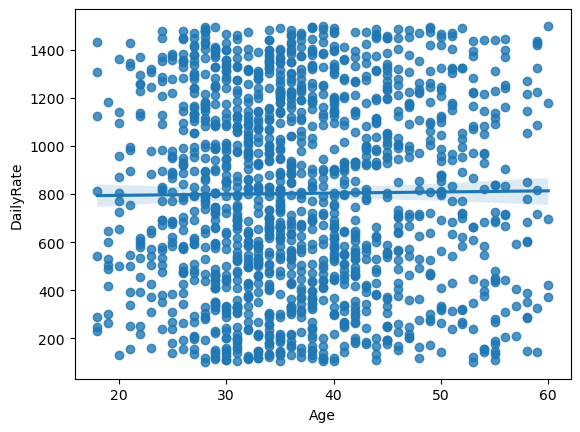

In [73]:
sb.regplot(df.Age,df.DailyRate)

### Ridge

In [ ]:
Ridge=Ridge()
Ridge.fit(xtrain,ytrain)

In [ ]:
Ridge.score(xtrain,ytrain)


In [ ]:
Ridge.score(xtest,ytest)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
KNN_reg=KNeighborsRegressor()
KNN_reg.fit(xtrain,ytrain)

In [ ]:
KNN_reg.score(xtrain,ytrain)

In [ ]:
KNN_reg.score(xtest,ytest)

### Hyperparameter tuning KNN

In [ ]:
KNN_reg1=KNeighborsRegressor()
hyp_grid={'n_neighbors':np.arange(3,20),'p':[1,2]}

gscv_KNN_reg1=GridSearchCV(KNN_reg1,hyp_grid,cv=5)
gscv_KNN_reg1.fit(xtrain,ytrain)
gscv_KNN_reg1.best_estimator_

In [ ]:
KNN_reg2=KNeighborsRegressor(n_neighbors=19, p=1)
KNN_reg2.fit(xtrain,ytrain)

In [ ]:
KNN_reg2.score(xtrain,ytrain)

In [ ]:
KNN_reg2.score(xtest,ytest)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DT_reg=DecisionTreeRegressor()
DT_reg.fit(xtrain,ytrain)

In [ ]:
DT_reg.score(xtrain,ytrain)

In [ ]:
DT_reg.score(xtest,ytest)

# Hyperparameter tuning on DT

In [ ]:
# DT_reg1=DecisionTreeRegressor()
# hyp_grid={'criterion':['mse','mae'],
#      'max_depth':np.arange(3,20),
#     'min_samples_split':np.arange(2,20),
#     'min_samples_leaf':np.arange(1,15)}

# gscv_DT_reg1=GridSearchCV(DT_reg1,hyp_grid,cv=5)
# gscv_DT_reg1.fit(xtrain,ytrain)
# gscv_DT_reg1.best_estimator_

In [ ]:
DT_reg2=DecisionTreeRegressor(criterion='mse', max_depth=4, min_samples_leaf=3,
                      min_samples_split=17)
DT_reg2.fit(xtrain,ytrain)

In [ ]:
DT_reg2.score(xtrain,ytrain)

In [ ]:
DT_reg2.score(xtest,ytest)

#### Here testing accuracy is negative which in tern concludes that data is nonlinear and has no relation what so ever to each other.

# 8.Form Classification Model using Y=attrition and choose the best model

### Logistic Regression

In [ ]:
final_df

In [ ]:
df_Lo_A=final_df.drop('Attrition',axis=1)
df_Lo_A

In [ ]:
y_Lo_A=df[['Attrition']]
y_Lo_A

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(df_Lo_A,y_Lo_A,test_size=0.25,random_state=26,stratify=y_Lo_A)

In [ ]:
xtrain

In [ ]:
ytest

### Model building and evaluation

In [ ]:
LogR=LogisticRegression()
LogR.fit(xtrain,ytrain)

In [ ]:
LogR.score(xtrain,ytrain)

In [ ]:
LogR.score(xtest,ytest)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN=KNeighborsClassifier()
KNN.fit(xtrain,ytrain)

In [ ]:
KNN.score(xtrain,ytrain)

In [ ]:
KNN.score(xtest,ytest)

### Hyperparameter tuning in KNN

In [ ]:
KNN1=KNeighborsClassifier()

hyp_grid={'n_neighbors':np.arange(3,40),'p':[1,2]}

gscv_KNN_model=GridSearchCV(KNN1,hyp_grid,cv=5)
gscv_KNN_model.fit(xtrain,ytrain)
gscv_KNN_model.best_estimator_

In [ ]:
KNN2=KNeighborsClassifier(n_neighbors=9,p=1)
KNN2.fit(xtrain,ytrain)

In [ ]:
KNN2.score(xtrain,ytrain)

In [ ]:
KNN2.score(xtest,ytest)

# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC()
svc_model.fit(xtrain,ytrain)

In [ ]:
svc_model.score(xtrain,ytrain)

In [ ]:
svc_model.score(xtest,ytest)

### Hyperparameter tuning on svm

In [ ]:
svc_model1 = SVC()

hyp_grid = {'C':np.arange(0,50),
            'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}

gscv_scv_model = GridSearchCV(svc_model1,hyp_grid,cv=5)

gscv_scv_model.fit(xtrain,ytrain)

gscv_scv_model.best_estimator_

In [ ]:
svc_model1 = SVC(C=3, kernel='linear')
svc_model1.fit(xtrain,ytrain)

In [ ]:
svc_model1.score(xtrain,ytrain)

In [ ]:
svc_model1.score(xtest,ytest)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT_clf=DecisionTreeClassifier()
DT_clf.fit(xtrain,ytrain)

In [ ]:
DT_clf.score(xtrain,ytrain)

In [ ]:
DT_clf.score(xtest,ytest)

### Pruning on DT

In [ ]:
DT_clf1=DecisionTreeClassifier()
DT_clf1.fit(xtrain,ytrain)

In [ ]:
a=DT_clf.cost_complexity_pruning_path(xtrain,ytrain)
a['ccp_alphas']

In [ ]:
ccp_alpha_list=a['ccp_alphas']
ccp_alpha_list

In [ ]:
Training_accuracy_list = []
Testing_accuracy_list = []
for ccp_alpha in ccp_alpha_list:
    dt_clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    dt_clf.fit(xtrain,ytrain)
    Training_accuracy = dt_clf.score(xtrain,ytrain)
    Training_accuracy_list.append(Training_accuracy)
    Testing_accuracy = dt_clf.score(xtest,ytest)
    Testing_accuracy_list.append(Testing_accuracy)
    print('ccp_alpha_value:',ccp_alpha)
    print('Training accuracy:',Training_accuracy)
    print('Testing accuracy:',Testing_accuracy)
    print('*'*50)

In [ ]:
Training_accuracy_list

In [ ]:
Testing_accuracy_list

In [ ]:
plt.plot(ccp_alpha_list,Training_accuracy_list,label='Training accuracy')
plt.plot(ccp_alpha_list,Testing_accuracy_list,label='Testing accuracy')
plt.legend()

In [ ]:
DT_clf2=DecisionTreeClassifier(ccp_alpha=0.006184091)
DT_clf2.fit(xtrain,ytrain)

In [ ]:
DT_clf2.score(xtrain,ytrain)

In [ ]:
DT_clf2.score(xtrain,ytrain)

## Baysian

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
Bay=BernoulliNB()
Bay.fit(xtrain,ytrain)

In [ ]:
Bay.score(xtrain,ytrain)

In [ ]:
Bay.score(xtest,ytest)

## ANN

In [ ]:
from keras import Sequential

In [ ]:
from keras.layers import Dense,Dropout

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
xtrain

In [ ]:
nn=Sequential()
nn.add(Dense(100,input_dim=(54)))
nn.add(Dense(100,activation='relu'))
nn.add(Dropout(0.3))
nn.add(Dense(100,activation='relu'))
nn.add(Dropout(0.3))
nn.add(Dense(1,activation='sigmoid'))

nn.compile(loss='binary_crossentropy',metrics='accuracy')

model=nn.fit(xtrain,ytrain,validation_split=0.25,epochs=200)


In [ ]:
model.history

In [ ]:
tr_acc=model.history['accuracy']
ts_acc=model.history['val_accuracy']

In [ ]:
tr_acc

In [ ]:
plt.plot(tr_acc,c='g')
plt.plot(ts_acc,c='r')

In [ ]:
es=EarlyStopping(monitor='val_loss',patience=20)

nn=Sequential()
nn.add(Dense(50,input_dim=(54)))
nn.add(Dense(50,activation='relu'))
nn.add(Dropout(0.6))
nn.add(Dense(50,activation='relu'))
nn.add(Dropout(0.6))
nn.add(Dense(1,activation='sigmoid'))

nn.compile(loss='binary_crossentropy',metrics='accuracy')

model=nn.fit(xtrain,ytrain,validation_split=0.3,epochs=50,callbacks=es)

In [ ]:
tr_acc1=model.history['accuracy']
ts_acc1=model.history['val_accuracy']

In [ ]:
plt.plot(tr_acc1,c='g')
plt.plot(ts_acc1,c='r')

#### Accuracy of logistic model is promising so predictions are performed using logistic model

In [ ]:
ypredtest_class=LogR.predict(xtest)
ypredtest_class

In [ ]:
yp=pd.DataFrame(ypredtest_class)
yp

In [ ]:
yp.replace({1:'Y',0:'N'},inplace=True)
yp

# 9.Clustering - Find intersting clusters using K-means, Heirarchical and DBSCAN clustering. Connect to Domain scenario and its usefulness in analysis
(Ignore Attrition Column)

a)Grouping of Emploees

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df_Lo_A

### Principal Component analysis

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=2)
px_pca=pca.fit_transform(df_Lo_A)
px_pca

In [ ]:
px_pca.shape

In [ ]:
Pca=pd.DataFrame(px_pca,columns=['p1','p2'])
Pca

In [ ]:
WCSS_list = []
for k in range(1,10):
    kmeans_model = KMeans(n_clusters=k)  
    kmeans_model.fit(Pca)
    WCSS = kmeans_model.inertia_
    WCSS_list.append(WCSS)
    print('K >>',k,'WCSS>>',WCSS)

In [ ]:
k = range(1,10)
plt.plot(k,WCSS_list)
plt.xlabel('Number of clusters(K)')
plt.ylabel('WCSS')
plt.title('Elbow method graph')

In [ ]:
K_Cluster=KMeans(n_clusters=5)
K_Cluster.fit(Pca)

In [ ]:
y_var = K_Cluster.fit_predict(Pca)
y_var

In [ ]:
Pca['Cluster']=y_var
Pca

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(Pca['p1'],Pca['p2'],c=y_var)
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')

In [ ]:
silhouette_score(Pca,Pca['Cluster'])

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
Pca1=pd.DataFrame(px_pca,columns=['p1','p2'])
Pca1

In [ ]:
DBScan=DBSCAN(eps=0.32, min_samples=25)
# DBScan.fit(Pca1)
np.unique(DBScan.fit_predict(Pca1))

In [ ]:
Pca1['Cluster']=DBScan.fit_predict(Pca1)
Pca1

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(Pca1['p1'],Pca1['p2'],c=DBScan.fit_predict(Pca1))
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')

In [ ]:
silhouette_score(Pca1,Pca1['Cluster'])

# Hierarchical

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
Pca2=pd.DataFrame(px_pca,columns=['p1','p2'])
Pca2

In [ ]:
plt.figure(figsize=(16,8))
dendrogram=sch.dendrogram(sch.linkage(Pca2,method='ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

y_hc = hc.fit_predict(Pca2)
y_hc

In [ ]:
np.unique(y_hc)

In [ ]:
Pca2['Cluster']=y_hc
Pca2

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(Pca2['p1'],Pca2['p2'],c=y_hc)
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')

In [ ]:
silhouette_score(Pca2,Pca2['Cluster'])